# Line Detection Analysis
## Comprehensive Analysis of Different Line Detection Algorithms

This notebook demonstrates various line detection algorithms applied to the Test1.png image:
- Standard Hough Line Transform
- Probabilistic Hough Line Transform  
- Line Segment Detector (LSD)
- Canny Edge Detection with Line Detection

We'll extract line coordinates and reconstruct the detected lines for comparison.

In [8]:
# Import Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
import os
from PIL import Image

print("All libraries imported successfully!")
print(f"OpenCV version: {cv2.__version__}")
print(f"NumPy version: {np.__version__}")

All libraries imported successfully!
OpenCV version: 4.12.0
NumPy version: 2.2.6


## 1. Load and Display Input Image

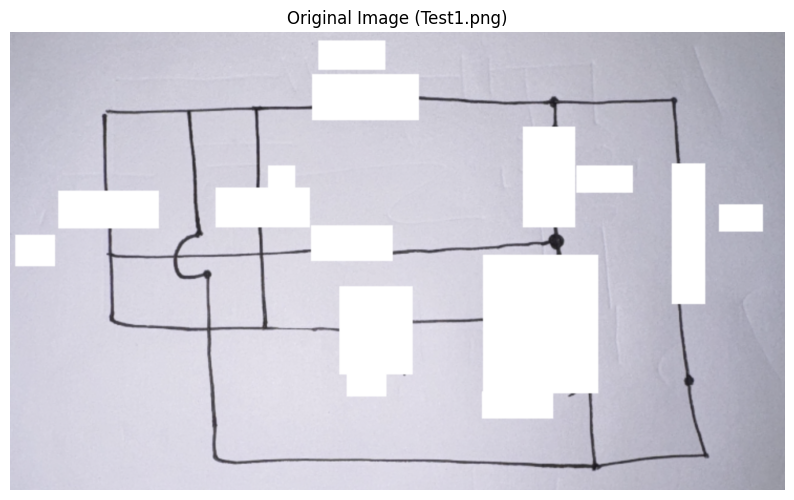

Image loaded successfully!
Image shape: (874, 1478, 3)
Image dtype: uint8


In [9]:
# Load the input image
image_path = 'Test1.png'

# Check if image exists
if os.path.exists(image_path):
    # Load image using OpenCV (BGR format)
    image_bgr = cv2.imread(image_path)
    # Convert to RGB for matplotlib display
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    # Display the original image
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.title('Original Image (Test1.png)')
    plt.axis('off')
    plt.show()
    
    print(f"Image loaded successfully!")
    print(f"Image shape: {image_rgb.shape}")
    print(f"Image dtype: {image_rgb.dtype}")
else:
    print(f"Error: Image '{image_path}' not found in current directory")

## 2. Image Preprocessing

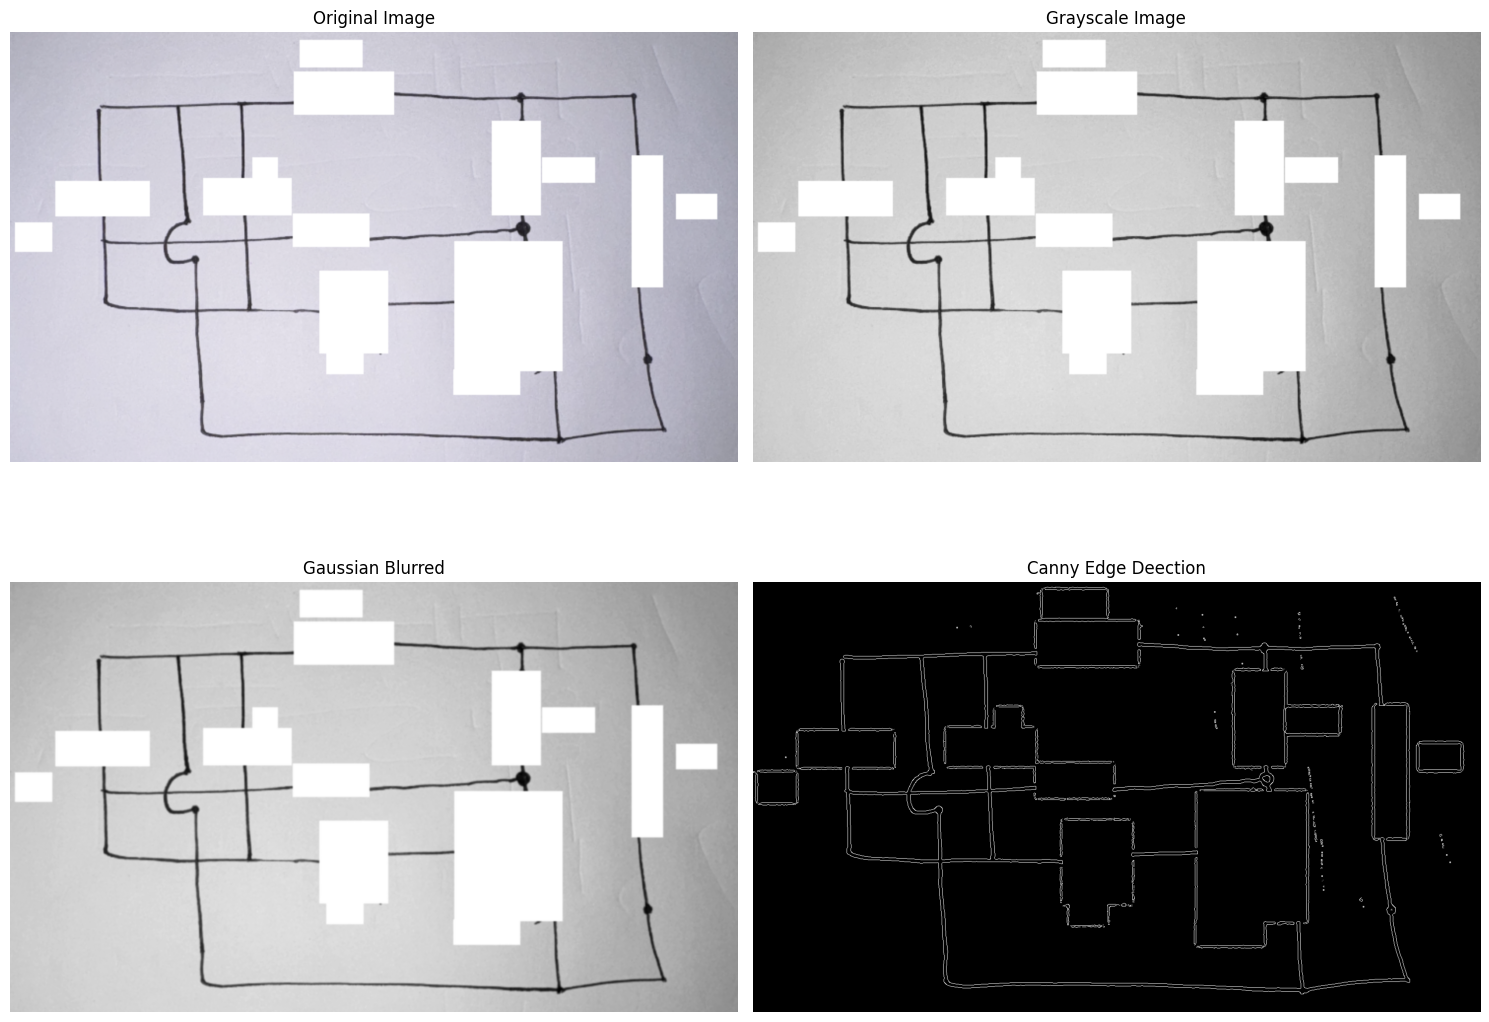

Preprocessing completed successfully!


In [10]:
# Convert to grayscale
gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
#edges = cv2.Canny(blurred, 50, 150, apertureSize=3)


  # Apply bilateral filter to reduce noise while preserving edges
bilateral = cv2.bilateralFilter(blurred, 9, 75, 75)
    
    # Apply morphological operations to clean up lines
kernel = np.ones((2,2), np.uint8)
cleaned = cv2.morphologyEx(bilateral, cv2.MORPH_CLOSE, kernel)

    # Apply adaptive threshold for better line detection
adaptive_thresh = cv2.adaptiveThreshold(cleaned, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY_INV, 11, 2)
    
    # Apply Canny with lower thresholds for handdrawn lines
edges = cv2.Canny(adaptive_thresh, 20, 60, apertureSize=3)

# Display preprocessing steps
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Grayscale Image')
axes[0, 1].axis('off')

axes[1, 0].imshow(blurred, cmap='gray')
axes[1, 0].set_title('Gaussian Blurred')
axes[1, 0].axis('off')

axes[1, 1].imshow(edges, cmap='gray')
axes[1, 1].set_title('Canny Edge Deection')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Preprocessing completed successfully!")

## 3. Standard Hough Line Transform

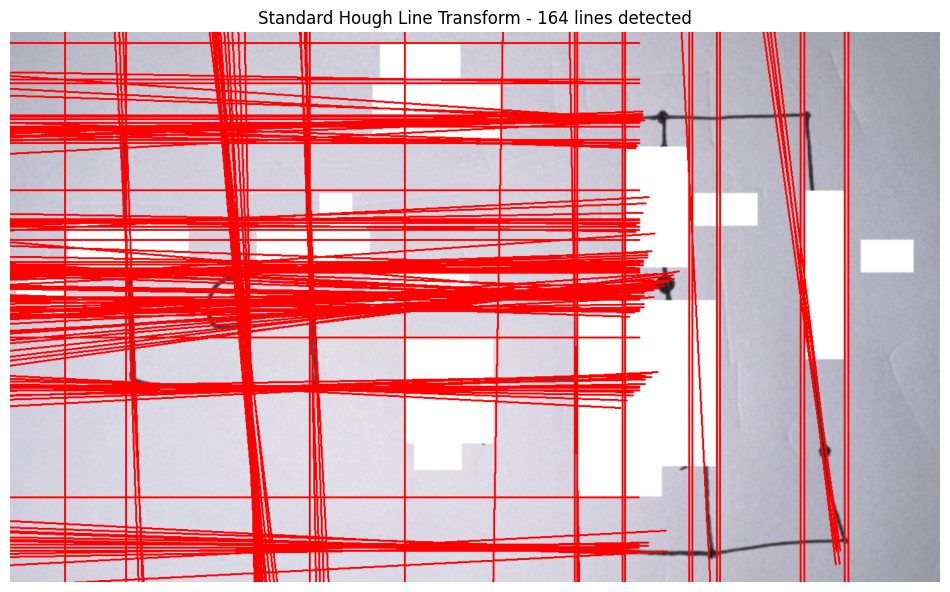

Standard Hough Transform detected 164 lines
Sample coordinates (x1, y1, x2, y2):
Line 1: (1262, 1000, 1262, -1000)
Line 2: (1123, 1000, 1123, -1000)
Line 3: (-1000, 424, 1000, 425)
Line 4: (901, 1000, 901, -1000)
Line 5: (1332, 1000, 1332, -1000)


In [11]:
# Apply Standard Hough Line Transform
lines_hough = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)

# Create a copy of the original image to draw lines
image_hough = image_rgb.copy()
hough_coordinates = []

if lines_hough is not None:
    for line in lines_hough:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        
        # Calculate line endpoints
        length = 1000  # Extended length for visualization
        x1 = int(x0 + length * (-b))
        y1 = int(y0 + length * (a))
        x2 = int(x0 - length * (-b))
        y2 = int(y0 - length * (a))
        
        # Store coordinates
        hough_coordinates.append((x1, y1, x2, y2))
        
        # Draw line
        cv2.line(image_hough, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(12, 8))
plt.imshow(image_hough)
plt.title(f'Standard Hough Line Transform - {len(hough_coordinates)} lines detected')
plt.axis('off')
plt.show()

print(f"Standard Hough Transform detected {len(hough_coordinates)} lines")
print("Sample coordinates (x1, y1, x2, y2):")
for i, coord in enumerate(hough_coordinates[:5]):  # Show first 5
    print(f"Line {i+1}: {coord}")

## 4. Probabilistic Hough Line Transform

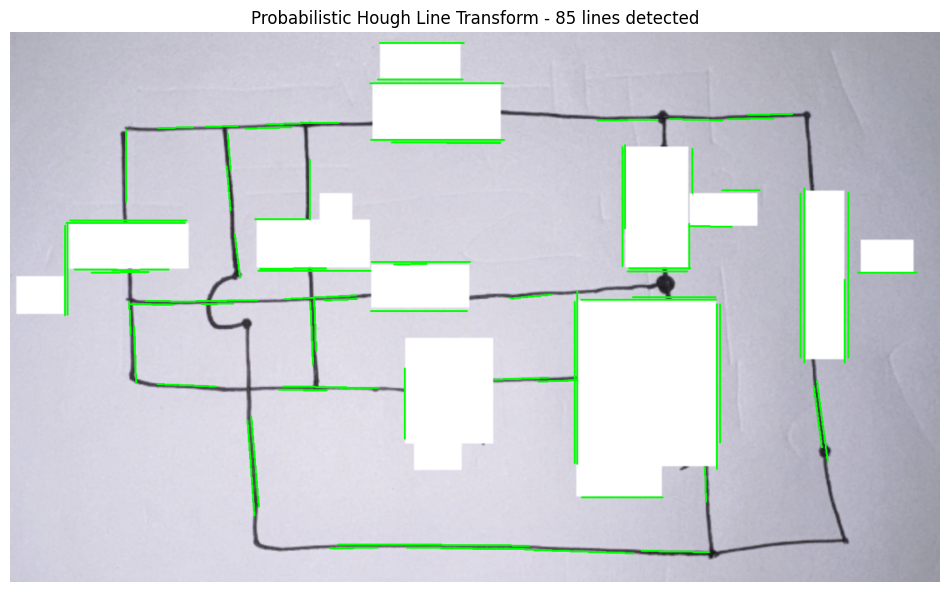

Probabilistic Hough Transform detected 85 lines
Sample coordinates (x1, y1, x2, y2):
Line 1: (np.int32(1262), np.int32(525), np.int32(1262), np.int32(248))
Line 2: (np.int32(907), np.int32(425), np.int32(1122), np.int32(425))
Line 3: (np.int32(1123), np.int32(694), np.int32(1123), np.int32(432))
Line 4: (np.int32(1332), np.int32(517), np.int32(1332), np.int32(255))
Line 5: (np.int32(901), np.int32(686), np.int32(901), np.int32(411))


In [12]:
# Apply Probabilistic Hough Line Transform
lines_prob = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, 
                            minLineLength=50, maxLineGap=10)

# Create a copy of the original image to draw lines
image_prob = image_rgb.copy()
prob_coordinates = []

if lines_prob is not None:
    for line in lines_prob:
        x1, y1, x2, y2 = line[0]
        
        # Store coordinates
        prob_coordinates.append((x1, y1, x2, y2))
        
        # Draw line
        cv2.line(image_prob, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(12, 8))
plt.imshow(image_prob)
plt.title(f'Probabilistic Hough Line Transform - {len(prob_coordinates)} lines detected')
plt.axis('off')
plt.show()

print(f"Probabilistic Hough Transform detected {len(prob_coordinates)} lines")
print("Sample coordinates (x1, y1, x2, y2):")
for i, coord in enumerate(prob_coordinates[:5]):  # Show first 5
    print(f"Line {i+1}: {coord}")

## 5. Line Segment Detector (LSD)

APPLYING ADVANCED LINE MERGING
Starting with 240 line segments
Parameters: endpoint_dist=25, angle=20
           parallel_dist=0, parallel_angle=0
Merged into 100 lines
Reduction: 140 segments (58.3%)
Merged into 100 lines
Reduction: 140 segments (58.3%)


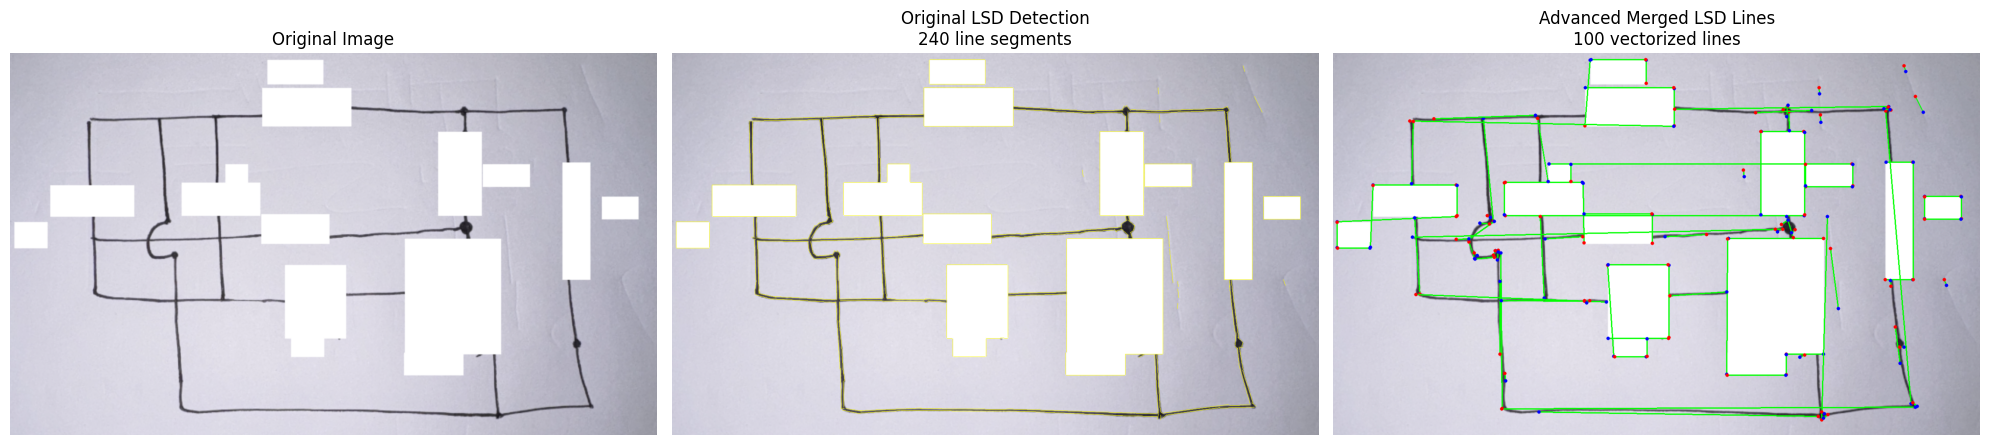


SAMPLE MERGED LINE COORDINATES
Line  1: (1120,425) → (903,425) | Length:  217.0px
Line  2: (393,373) → (1076,373) | Length:  683.0px
Line  3: (1075,181) → (978,181) | Length:   97.0px
Line  4: (1261,519) → (1324,519) | Length:   63.0px
Line  5: (779,168) → (779, 83) | Length:   85.0px
Line  6: (1035,689) → (1120,689) | Length:   85.0px
Line  7: (575,168) → (587, 18) | Length:  150.5px
Line  8: (1324,251) → (1263,251) | Length:   61.0px
Line  9: (281,375) → (  9,387) | Length:  272.3px
Line 10: (281,303) → ( 91,303) | Length:  190.0px


In [13]:
# Apply Line Segment Detector (LSD)
lsd = cv2.createLineSegmentDetector()
lines_lsd = lsd.detect(gray)[0]

# ============================================================================
# CONTROL PARAMETERS - Adjust these values to fine-tune line merging behavior
# ============================================================================
ENDPOINT_DISTANCE_THRESHOLD = 25    # Max distance between endpoints to merge lines
ANGLE_THRESHOLD = 20                # Max angle difference (degrees) for merging
PARALLEL_DISTANCE_THRESHOLD = 0     # Max perpendicular distance for parallel line merging
PARALLEL_ANGLE_THRESHOLD = 0       # Stricter angle threshold for parallel merging

def merge_lsd_lines_advanced(lines, 
                           endpoint_distance_threshold=ENDPOINT_DISTANCE_THRESHOLD,
                           angle_threshold=ANGLE_THRESHOLD, 
                           parallel_distance_threshold=PARALLEL_DISTANCE_THRESHOLD,
                           parallel_angle_threshold=PARALLEL_ANGLE_THRESHOLD):
    """
    Advanced line merging that handles both endpoint connection and parallel line merging
    
    Parameters:
    - endpoint_distance_threshold: Maximum distance between endpoints to connect lines
    - angle_threshold: Maximum angle difference for regular endpoint merging
    - parallel_distance_threshold: Maximum perpendicular distance for parallel line merging
    - parallel_angle_threshold: Maximum angle difference for parallel line detection
    """
    if lines is None or len(lines) == 0:
        return []
    
    # Convert to simpler format
    line_segments = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        line_segments.append([int(x1), int(y1), int(x2), int(y2)])
    
    print(f"Starting with {len(line_segments)} line segments")
    print(f"Parameters: endpoint_dist={endpoint_distance_threshold}, angle={angle_threshold}")
    print(f"           parallel_dist={parallel_distance_threshold}, parallel_angle={parallel_angle_threshold}")
    
    def distance_point_to_point(p1, p2):
        """Calculate Euclidean distance between two points"""
        return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    
    def angle_between_lines(line1, line2):
        """Calculate angle difference between two lines in degrees"""
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2
        
        # Calculate angles of both lines
        angle1 = np.arctan2(y2 - y1, x2 - x1)
        angle2 = np.arctan2(y4 - y3, x4 - x3)
        
        # Calculate absolute difference and normalize to [0, 180]
        diff = abs(angle1 - angle2)
        if diff > np.pi:
            diff = 2 * np.pi - diff
        if diff > np.pi/2:
            diff = np.pi - diff
            
        return np.degrees(diff)
    
    def distance_point_to_line(point, line_start, line_end):
        """Calculate perpendicular distance from a point to a line segment"""
        x0, y0 = point
        x1, y1 = line_start
        x2, y2 = line_end
        
        # Handle degenerate case (line is a point)
        if x1 == x2 and y1 == y2:
            return distance_point_to_point(point, (x1, y1))
        
        # Calculate perpendicular distance using formula
        A = y2 - y1
        B = x1 - x2
        C = x2 * y1 - x1 * y2
        
        distance = abs(A * x0 + B * y0 + C) / np.sqrt(A**2 + B**2)
        return distance
    
    def are_lines_parallel_and_close(line1, line2):
        """Check if two lines are parallel and close enough to merge"""
        # First check if they are parallel (similar angles)
        angle_diff = angle_between_lines(line1, line2)
        if angle_diff > parallel_angle_threshold:
            return False
        
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2
        
        # Calculate perpendicular distances between the lines
        distances = [
            distance_point_to_line((x1, y1), (x3, y3), (x4, y4)),
            distance_point_to_line((x2, y2), (x3, y3), (x4, y4)),
            distance_point_to_line((x3, y3), (x1, y1), (x2, y2)),
            distance_point_to_line((x4, y4), (x1, y1), (x2, y2))
        ]
        
        # Use minimum distance
        min_distance = min(distances)
        return min_distance <= parallel_distance_threshold
    
    def find_closest_endpoints(line1, line2):
        """Find the closest pair of endpoints between two lines"""
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2
        
        endpoints1 = [(x1, y1), (x2, y2)]
        endpoints2 = [(x3, y3), (x4, y4)]
        
        min_dist = float('inf')
        closest_info = None
        
        for i, p1 in enumerate(endpoints1):
            for j, p2 in enumerate(endpoints2):
                dist = distance_point_to_point(p1, p2)
                if dist < min_dist:
                    min_dist = dist
                    closest_info = (i, j, dist)
        
        return closest_info
    
    def merge_lines_by_endpoints(line1, line2):
        """Merge two lines by connecting their farthest endpoints"""
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2
        
        # Get all four endpoints
        points = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
        
        # Find the two most distant points to create the longest possible line
        max_dist = 0
        best_endpoints = None
        
        for i in range(len(points)):
            for j in range(i + 1, len(points)):
                dist = distance_point_to_point(points[i], points[j])
                if dist > max_dist:
                    max_dist = dist
                    best_endpoints = (points[i], points[j])
        
        if best_endpoints:
            p1, p2 = best_endpoints
            return [p1[0], p1[1], p2[0], p2[1]]
        else:
            return line1  # Fallback
    
    def merge_parallel_lines(line1, line2):
        """Merge two parallel lines by averaging their positions and spanning their extent"""
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2
        
        # Calculate direction vectors
        dx1, dy1 = x2 - x1, y2 - y1
        dx2, dy2 = x4 - x3, y4 - y3
        
        # Average the direction vectors
        avg_dx = (dx1 + dx2) / 2
        avg_dy = (dy1 + dy2) / 2
        
        # Normalize the average direction
        length = np.sqrt(avg_dx**2 + avg_dy**2)
        if length > 0:
            avg_dx /= length
            avg_dy /= length
        else:
            # If lines have no length, return one of them
            return line1
        
        # Find the center points of both lines
        center1 = ((x1 + x2) / 2, (y1 + y2) / 2)
        center2 = ((x3 + x4) / 2, (y3 + y4) / 2)
        
        # Average center point
        avg_center_x = (center1[0] + center2[0]) / 2
        avg_center_y = (center1[1] + center2[1]) / 2
        
        # Project all endpoints onto the averaged direction to find the span
        all_points = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
        projections = []
        
        for x, y in all_points:
            # Vector from average center to point
            dx = x - avg_center_x
            dy = y - avg_center_y
            # Project onto the average direction
            projection = dx * avg_dx + dy * avg_dy
            projections.append(projection)
        
        # Find the extent of projections
        min_proj = min(projections)
        max_proj = max(projections)
        
        # Calculate new endpoints
        new_x1 = avg_center_x + min_proj * avg_dx
        new_y1 = avg_center_y + min_proj * avg_dy
        new_x2 = avg_center_x + max_proj * avg_dx
        new_y2 = avg_center_y + max_proj * avg_dy
        
        return [int(new_x1), int(new_y1), int(new_x2), int(new_y2)]
    
    # Main merging algorithm
    merged_lines = []
    used_indices = set()
    
    for i, current_line in enumerate(line_segments):
        if i in used_indices:
            continue
        
        # Start with the current line
        result_line = current_line.copy()
        used_indices.add(i)
        
        # Keep trying to merge with other lines until no more merges are possible
        changed = True
        while changed:
            changed = False
            
            for j, other_line in enumerate(line_segments):
                if j in used_indices:
                    continue
                
                # Calculate angle difference
                angle_diff = angle_between_lines(result_line, other_line)
                
                # Strategy 1: Endpoint-based merging
                if angle_diff <= angle_threshold:
                    closest = find_closest_endpoints(result_line, other_line)
                    if closest and closest[2] <= endpoint_distance_threshold:
                        result_line = merge_lines_by_endpoints(result_line, other_line)
                        used_indices.add(j)
                        changed = True
                        break
                
                # Strategy 2: Parallel line merging
                if are_lines_parallel_and_close(result_line, other_line):
                    result_line = merge_parallel_lines(result_line, other_line)
                    used_indices.add(j)
                    changed = True
                    break
        
        merged_lines.append(result_line)
    
    print(f"Merged into {len(merged_lines)} lines")
    print(f"Reduction: {len(line_segments) - len(merged_lines)} segments ({((len(line_segments) - len(merged_lines))/len(line_segments)*100):.1f}%)")
    
    return merged_lines

# Store original LSD coordinates
lsd_coordinates_original = []
if lines_lsd is not None:
    for line in lines_lsd:
        x1, y1, x2, y2 = line[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        lsd_coordinates_original.append((x1, y1, x2, y2))

# Apply advanced line merging
print("=" * 60)
print("APPLYING ADVANCED LINE MERGING")
print("=" * 60)
merged_lsd_lines = merge_lsd_lines_advanced(lines_lsd)

# Create visualization images
image_lsd_original = image_rgb.copy()
image_lsd_merged = image_rgb.copy()

# Draw original LSD lines
for coord in lsd_coordinates_original:
    x1, y1, x2, y2 = coord
    cv2.line(image_lsd_original, (x1, y1), (x2, y2), (255, 255, 0), 1)

# Draw merged LSD lines with endpoints
for line in merged_lsd_lines:
    x1, y1, x2, y2 = line
    cv2.line(image_lsd_merged, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # Add colored endpoint markers
    cv2.circle(image_lsd_merged, (x1, y1), 4, (255, 0, 0), -1)  # Red start
    cv2.circle(image_lsd_merged, (x2, y2), 4, (0, 0, 255), -1)  # Blue end

# Display comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_lsd_original)
axes[1].set_title(f'Original LSD Detection\n{len(lsd_coordinates_original)} line segments')
axes[1].axis('off')

axes[2].imshow(image_lsd_merged)
axes[2].set_title(f'Advanced Merged LSD Lines\n{len(merged_lsd_lines)} vectorized lines')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Display sample results
print("\n" + "=" * 60)
print("SAMPLE MERGED LINE COORDINATES")
print("=" * 60)
for i, line in enumerate(merged_lsd_lines[:10]):  # Show first 10
    x1, y1, x2, y2 = line
    length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    print(f"Line {i+1:2d}: ({x1:3d},{y1:3d}) → ({x2:3d},{y2:3d}) | Length: {length:6.1f}px")

# Update lsd_coordinates for later use in the notebook
lsd_coordinates = [(line[0], line[1], line[2], line[3]) for line in merged_lsd_lines]

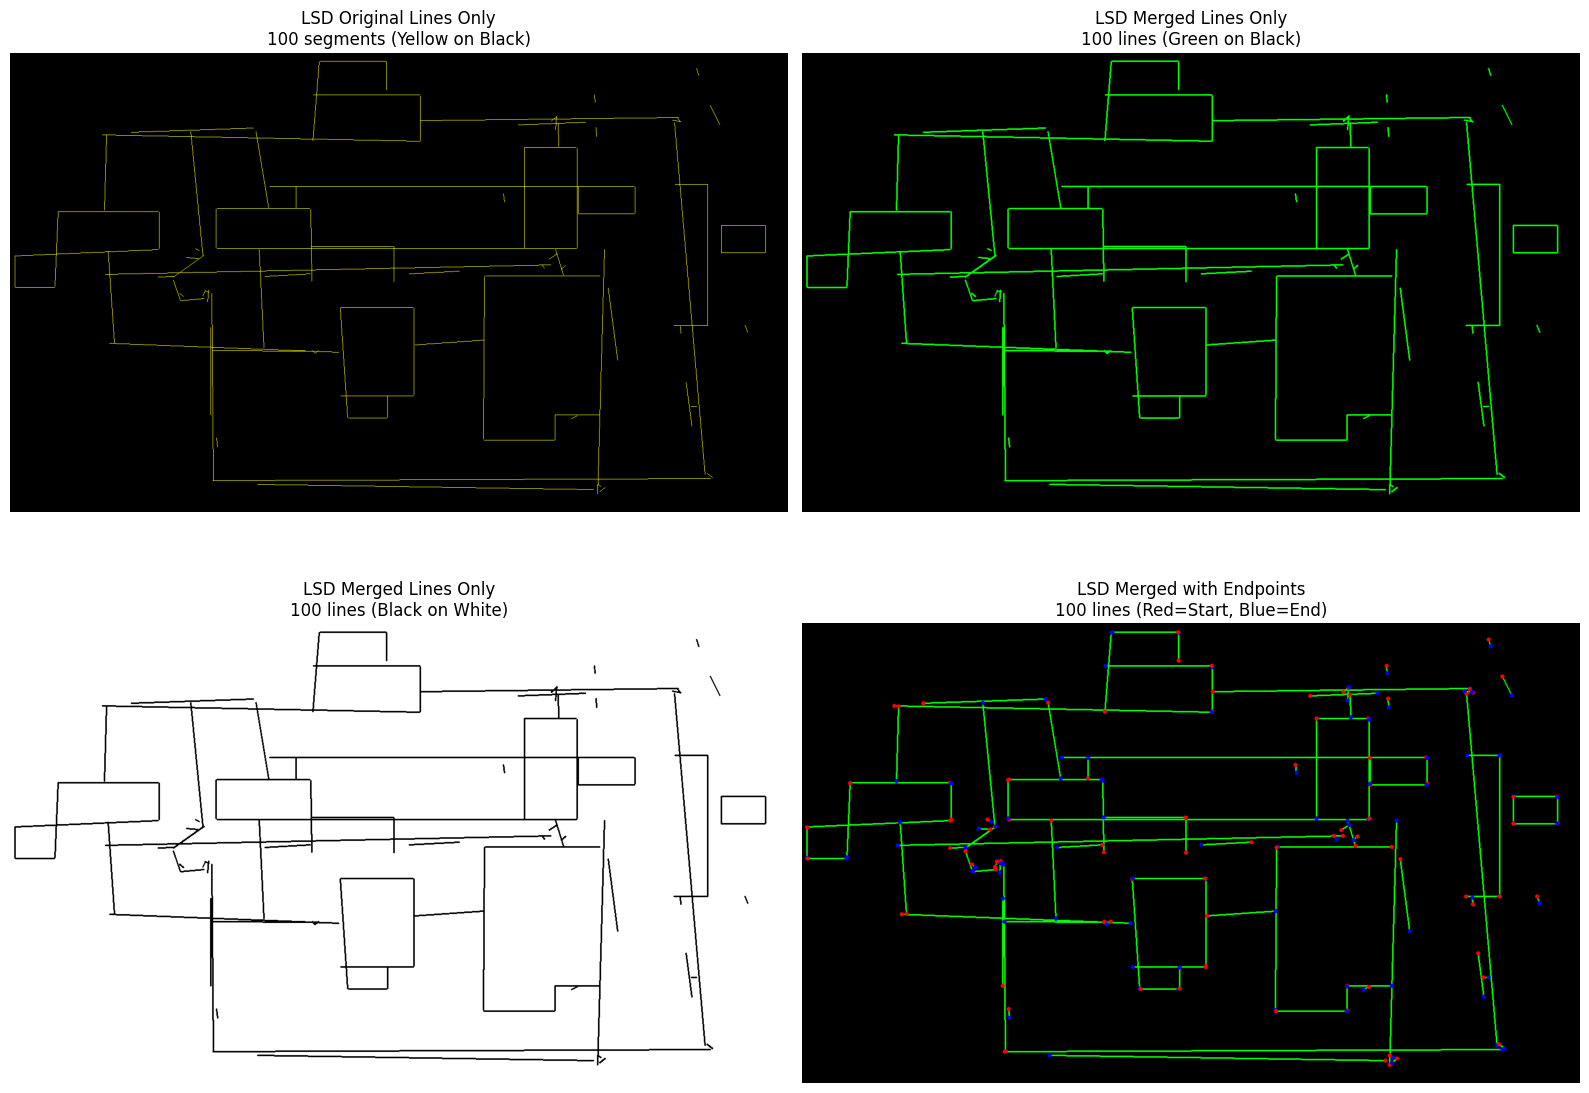

Clean LSD line visualization saved as 'lsd_lines_clean.png'

LSD Line Analysis:
- Original segments: 100
- Merged lines: 100
- Average line length: 145.8 pixels


In [14]:
# Visualize LSD lines on clean background (no original image)
def create_clean_line_visualization(lines, image_shape, line_color=(255, 255, 255), bg_color=(0, 0, 0), line_thickness=2):
    """
    Create a clean visualization showing only the detected lines
    """
    # Create clean background
    clean_image = np.full((image_shape[0], image_shape[1], 3), bg_color, dtype=np.uint8)
    
    # Draw lines
    for line in lines:
        x1, y1, x2, y2 = line
        cv2.line(clean_image, (x1, y1), (x2, y2), line_color, line_thickness)
    
    return clean_image

# Create clean visualizations for both original and merged LSD lines
clean_lsd_original = create_clean_line_visualization(lsd_coordinates, image_rgb.shape, 
                                                   line_color=(255, 255, 0), bg_color=(0, 0, 0), line_thickness=1)

clean_lsd_merged = create_clean_line_visualization(merged_lsd_lines, image_rgb.shape, 
                                                 line_color=(0, 255, 0), bg_color=(0, 0, 0), line_thickness=2)

# Also create a white background version for better visibility
clean_lsd_merged_white = create_clean_line_visualization(merged_lsd_lines, image_rgb.shape, 
                                                       line_color=(0, 0, 0), bg_color=(255, 255, 255), line_thickness=2)

# Display clean line visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].imshow(clean_lsd_original)
axes[0, 0].set_title(f'LSD Original Lines Only\n{len(lsd_coordinates)} segments (Yellow on Black)')
axes[0, 0].axis('off')

axes[0, 1].imshow(clean_lsd_merged)
axes[0, 1].set_title(f'LSD Merged Lines Only\n{len(merged_lsd_lines)} lines (Green on Black)')
axes[0, 1].axis('off')

axes[1, 0].imshow(clean_lsd_merged_white)
axes[1, 0].set_title(f'LSD Merged Lines Only\n{len(merged_lsd_lines)} lines (Black on White)')
axes[1, 0].axis('off')

# Create a version with endpoint markers for the merged lines
clean_lsd_with_points = clean_lsd_merged.copy()
for line in merged_lsd_lines:
    x1, y1, x2, y2 = line
    cv2.circle(clean_lsd_with_points, (x1, y1), 4, (255, 0, 0), -1)  # Red start points
    cv2.circle(clean_lsd_with_points, (x2, y2), 4, (0, 0, 255), -1)  # Blue end points

axes[1, 1].imshow(clean_lsd_with_points)
axes[1, 1].set_title(f'LSD Merged with Endpoints\n{len(merged_lsd_lines)} lines (Red=Start, Blue=End)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Save the clean line visualization
cv2.imwrite('lsd_lines_clean.png', cv2.cvtColor(clean_lsd_merged_white, cv2.COLOR_RGB2BGR))
print("Clean LSD line visualization saved as 'lsd_lines_clean.png'")

print(f"\nLSD Line Analysis:")
print(f"- Original segments: {len(lsd_coordinates)}")
print(f"- Merged lines: {len(merged_lsd_lines)}")
print(f"- Average line length: {np.mean([np.sqrt((line[2]-line[0])**2 + (line[3]-line[1])**2) for line in merged_lsd_lines]):.1f} pixels")

## 6. Enhanced Canny Edge Detection with Improved Parameters

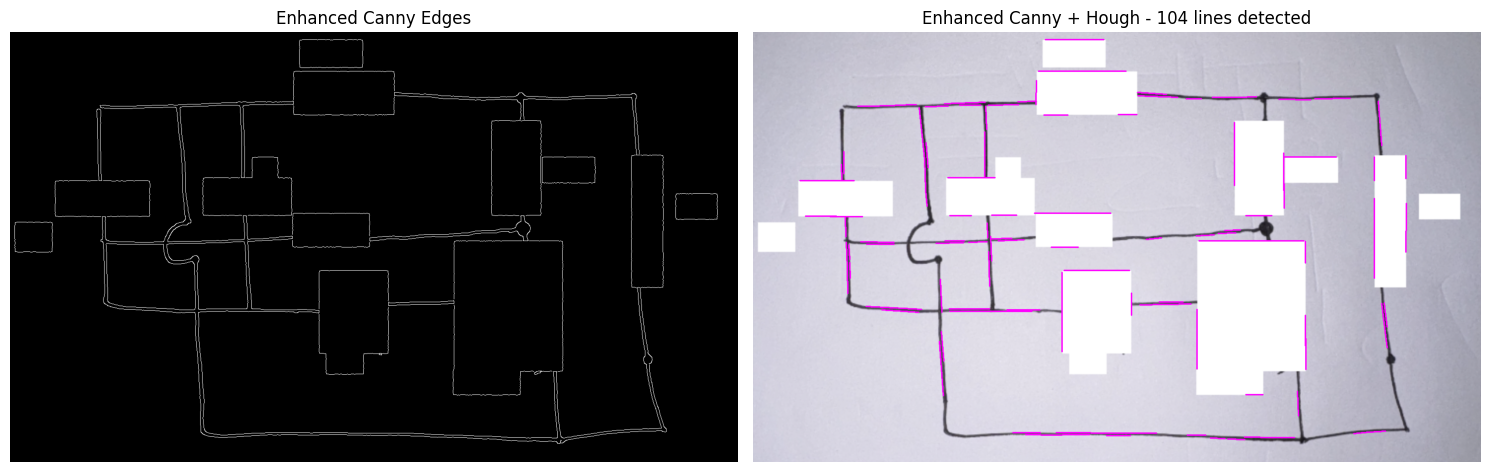

Enhanced Canny + Hough detected 104 lines
Sample coordinates (x1, y1, x2, y2):
Line 1: (np.int32(389), np.int32(425), np.int32(429), np.int32(425))
Line 2: (np.int32(371), np.int32(430), np.int32(427), np.int32(429))
Line 3: (np.int32(901), np.int32(685), np.int32(901), np.int32(564))
Line 4: (np.int32(212), np.int32(152), np.int32(256), np.int32(152))
Line 5: (np.int32(1261), np.int32(303), np.int32(1261), np.int32(255))


In [15]:
# Enhanced Canny edge detection with different parameters
edges_enhanced = cv2.Canny(blurred, 30, 100, apertureSize=3)

# Apply Probabilistic Hough on enhanced edges
lines_enhanced = cv2.HoughLinesP(edges_enhanced, 1, np.pi/180, threshold=80, 
                                minLineLength=30, maxLineGap=5)

# Create a copy of the original image to draw lines
image_enhanced = image_rgb.copy()
enhanced_coordinates = []

if lines_enhanced is not None:
    for line in lines_enhanced:
        x1, y1, x2, y2 = line[0]
        
        # Store coordinates
        enhanced_coordinates.append((x1, y1, x2, y2))
        
        # Draw line
        cv2.line(image_enhanced, (x1, y1), (x2, y2), (255, 0, 255), 2)

plt.figure(figsize=(15, 5))

# Show enhanced edges
plt.subplot(1, 2, 1)
plt.imshow(edges_enhanced, cmap='gray')
plt.title('Enhanced Canny Edges')
plt.axis('off')

# Show detected lines
plt.subplot(1, 2, 2)
plt.imshow(image_enhanced)
plt.title(f'Enhanced Canny + Hough - {len(enhanced_coordinates)} lines detected')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Enhanced Canny + Hough detected {len(enhanced_coordinates)} lines")
print("Sample coordinates (x1, y1, x2, y2):")
for i, coord in enumerate(enhanced_coordinates[:5]):  # Show first 5
    print(f"Line {i+1}: {coord}")

## 7. Extract and Store All Line Coordinates

In [16]:
# Store all detected line coordinates in a dictionary
all_coordinates = {
    'Standard Hough': hough_coordinates,
    'Probabilistic Hough': prob_coordinates,
    'LSD': lsd_coordinates,
    'Enhanced Canny + Hough': enhanced_coordinates
}

# Print summary of detected lines
print("=== LINE DETECTION SUMMARY ===")
total_lines = 0
for method, coords in all_coordinates.items():
    print(f"{method}: {len(coords)} lines detected")
    total_lines += len(coords)

print(f"\nTotal lines detected across all methods: {total_lines}")

# Save coordinates to a text file for future use
with open('detected_lines_coordinates.txt', 'w') as f:
    f.write("Line Detection Coordinates Summary\n")
    f.write("==================================\n\n")
    
    for method, coords in all_coordinates.items():
        f.write(f"{method}:\n")
        f.write(f"Number of lines: {len(coords)}\n")
        f.write("Coordinates (x1, y1, x2, y2):\n")
        for i, coord in enumerate(coords):
            f.write(f"  Line {i+1}: {coord}\n")
        f.write("\n")

print("\nCoordinates saved to 'detected_lines_coordinates.txt'")

=== LINE DETECTION SUMMARY ===
Standard Hough: 164 lines detected
Probabilistic Hough: 85 lines detected
LSD: 100 lines detected
Enhanced Canny + Hough: 104 lines detected

Total lines detected across all methods: 453

Coordinates saved to 'detected_lines_coordinates.txt'


## 8. Reconstruct Lines from Saved Coordinates

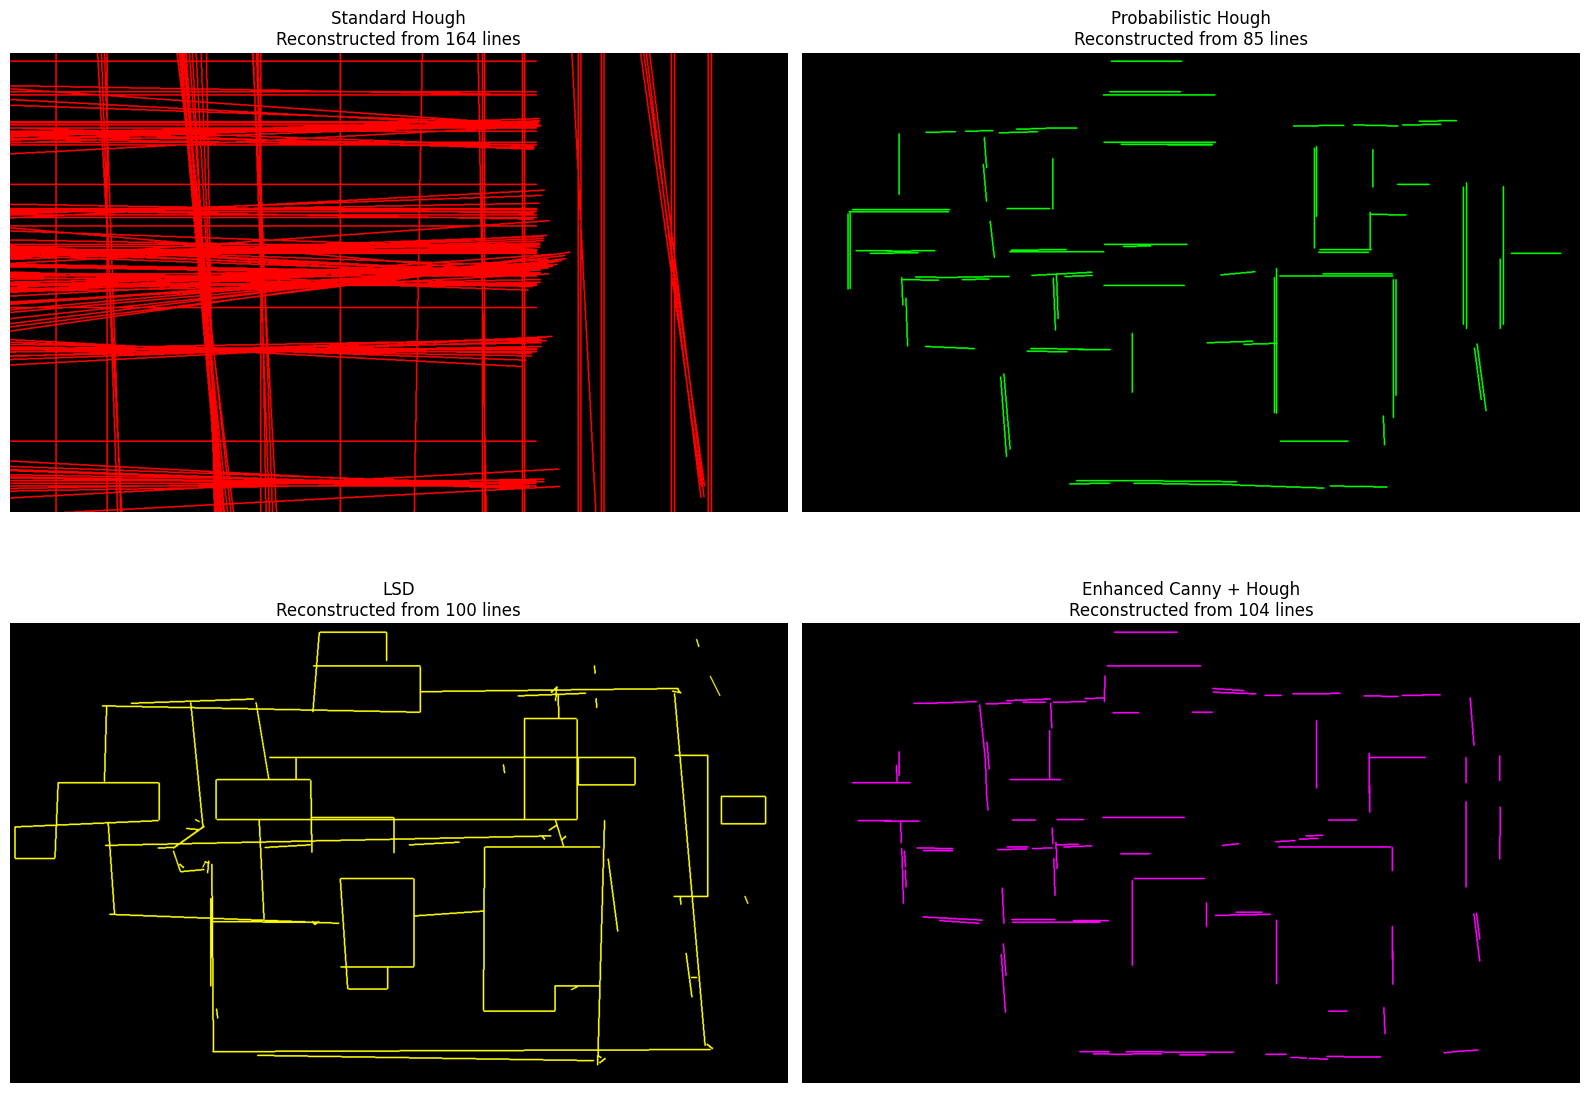

Lines successfully reconstructed from stored coordinates!


In [17]:
# Function to reconstruct lines from coordinates
def reconstruct_lines_from_coordinates(coordinates, image_shape, method_name, color=(255, 255, 255)):
    """
    Reconstruct lines from stored coordinates
    """
    # Create a black canvas
    reconstructed = np.zeros((image_shape[0], image_shape[1], 3), dtype=np.uint8)
    
    # Draw lines using stored coordinates
    for coord in coordinates:
        x1, y1, x2, y2 = coord
        cv2.line(reconstructed, (x1, y1), (x2, y2), color, 2)
    
    return reconstructed

# Reconstruct lines for each method
colors = [(255, 0, 0), (0, 255, 0), (255, 255, 0), (255, 0, 255)]  # Red, Green, Yellow, Magenta
method_names = list(all_coordinates.keys())

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (method, coords) in enumerate(all_coordinates.items()):
    reconstructed = reconstruct_lines_from_coordinates(coords, image_rgb.shape, method, colors[i])
    
    axes[i].imshow(reconstructed)
    axes[i].set_title(f'{method}\nReconstructed from {len(coords)} lines')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print("Lines successfully reconstructed from stored coordinates!")

## 9. Combined Reconstruction - All Methods Together

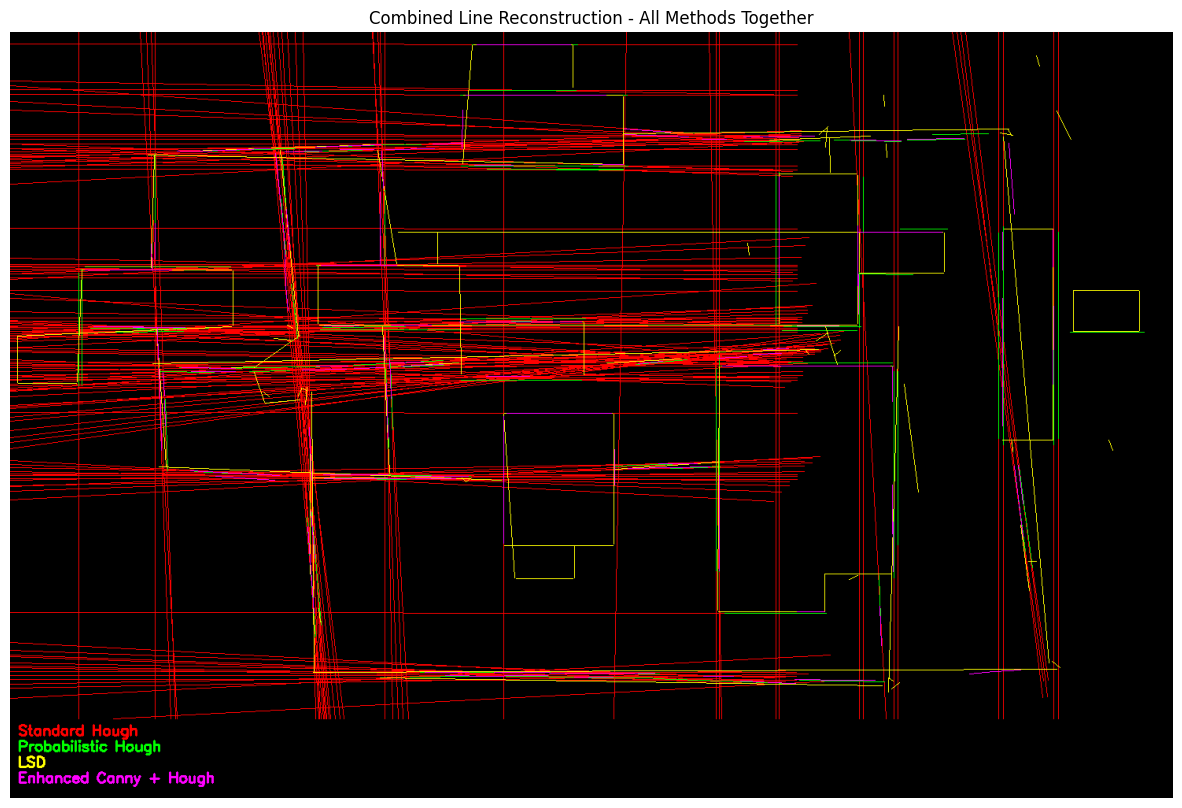

Combined reconstruction saved as 'combined_line_reconstruction.png'


In [18]:
# Create a combined reconstruction with all methods
combined_image = np.zeros((image_rgb.shape[0], image_rgb.shape[1], 3), dtype=np.uint8)

# Draw lines from all methods with different colors
for i, (method, coords) in enumerate(all_coordinates.items()):
    for coord in coords:
        x1, y1, x2, y2 = coord
        cv2.line(combined_image, (x1, y1), (x2, y2), colors[i], 1)

# Create a legend image
legend_height = 100
legend_width = image_rgb.shape[1]
legend = np.zeros((legend_height, legend_width, 3), dtype=np.uint8)

# Add legend text
y_pos = 20
for i, method in enumerate(method_names):
    cv2.putText(legend, f"{method}", (10, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.6, colors[i], 2)
    y_pos += 20

# Combine image and legend
final_image = np.vstack([combined_image, legend])

plt.figure(figsize=(15, 12))
plt.imshow(final_image)
plt.title('Combined Line Reconstruction - All Methods Together')
plt.axis('off')
plt.show()

# Save the combined reconstruction
cv2.imwrite('combined_line_reconstruction.png', cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))
print("Combined reconstruction saved as 'combined_line_reconstruction.png'")

## 10. Final Comparison and Analysis

NameError: name 'image_lsd' is not defined

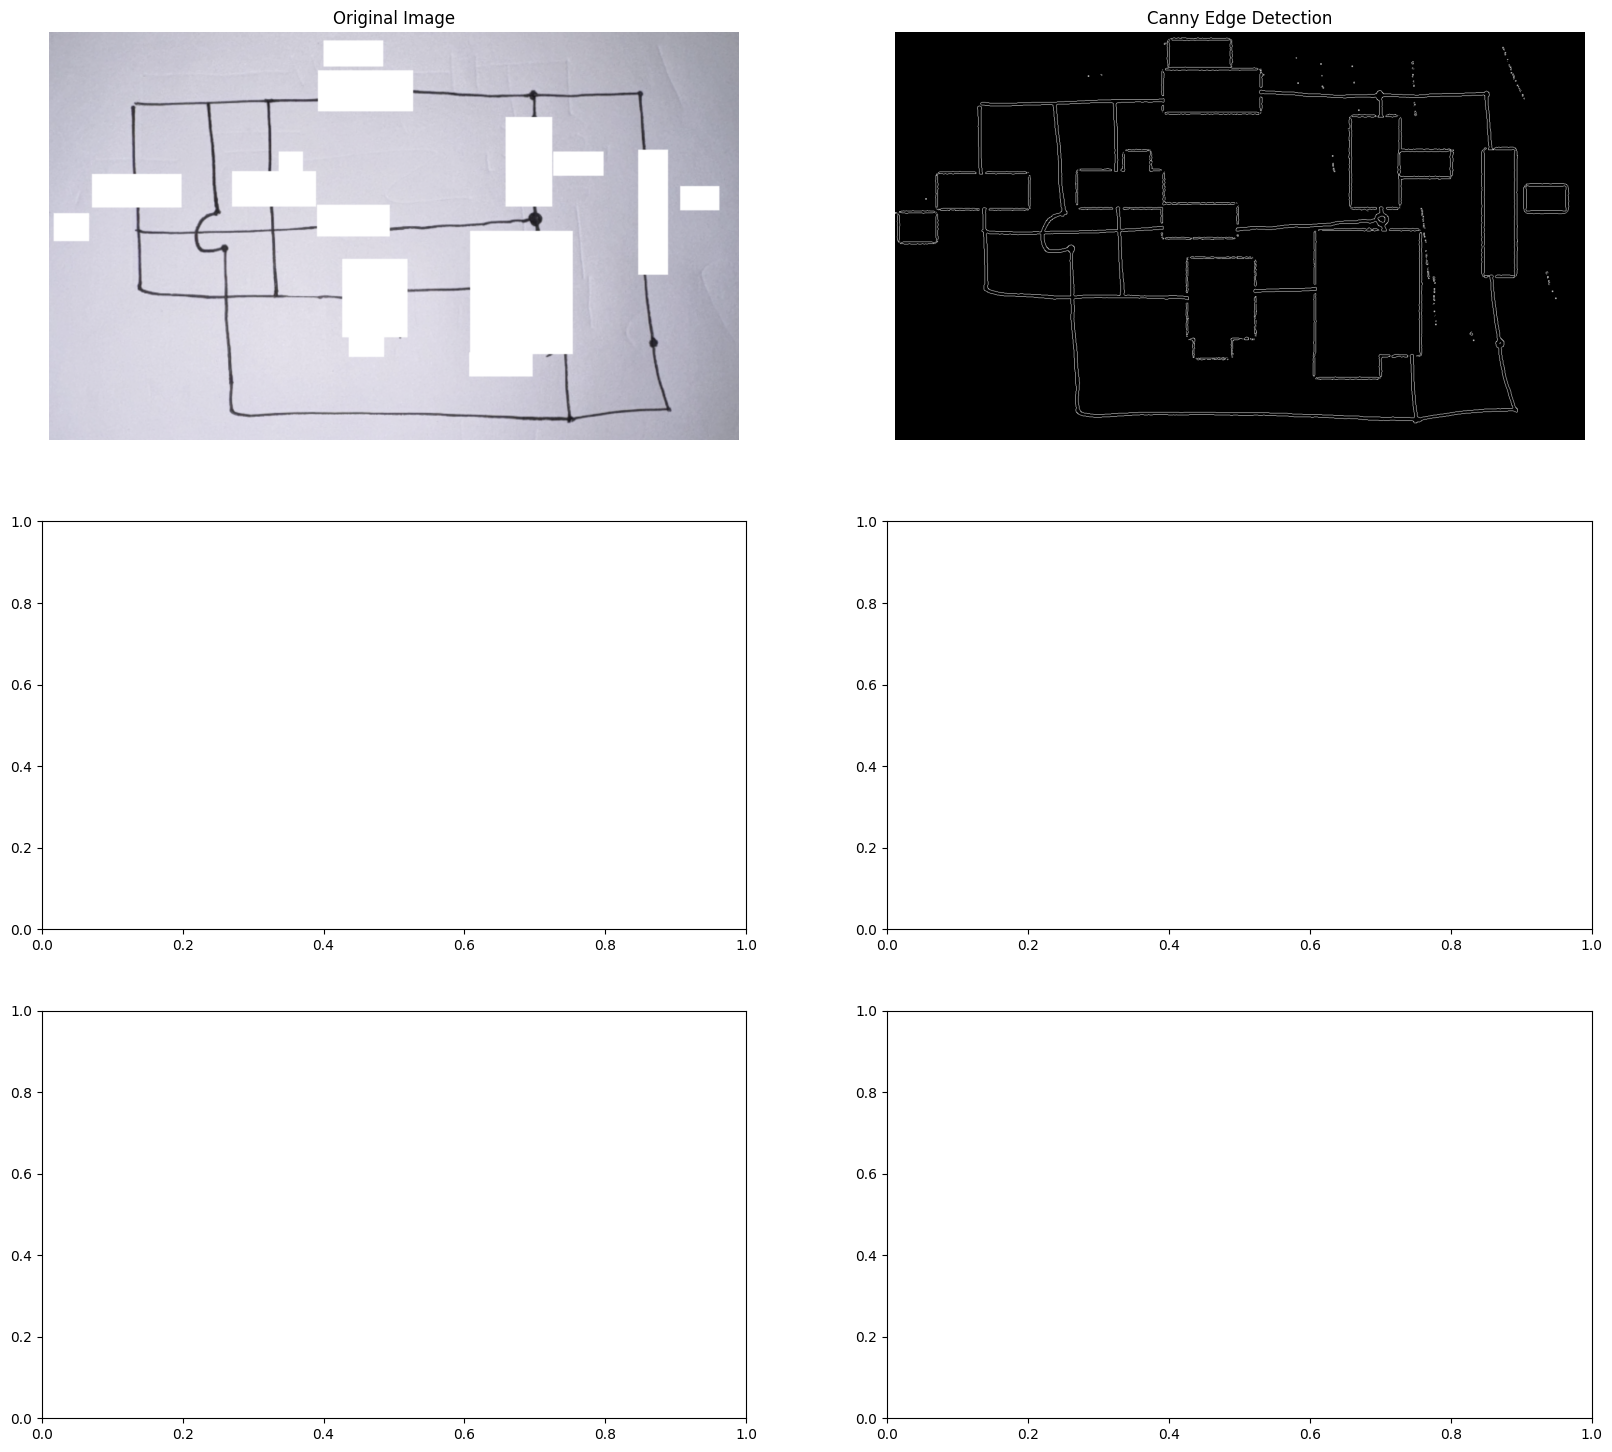

In [19]:
# Create a comprehensive comparison visualization
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# Original image
axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Preprocessed edge image
axes[0, 1].imshow(edges, cmap='gray')
axes[0, 1].set_title('Canny Edge Detection')
axes[0, 1].axis('off')

# All detection results overlaid on original image
method_images = [image_hough, image_prob, image_lsd, image_enhanced]
method_titles = ['Standard Hough Transform', 'Probabilistic Hough Transform', 
                'Line Segment Detector (LSD)', 'Enhanced Canny + Hough']

for i, (img, title) in enumerate(zip(method_images, method_titles)):
    row = (i // 2) + 1
    col = i % 2
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'{title}\n{len(all_coordinates[list(all_coordinates.keys())[i]])} lines')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Performance analysis
print("=== PERFORMANCE ANALYSIS ===")
print(f"{'Method':<25} {'Lines Detected':<15} {'Characteristics'}")
print("-" * 70)
print(f"{'Standard Hough':<25} {len(hough_coordinates):<15} {'Full lines, may extend beyond image'}")
print(f"{'Probabilistic Hough':<25} {len(prob_coordinates):<15} {'Line segments, more precise'}")
print(f"{'LSD':<25} {len(lsd_coordinates):<15} {'Very accurate, sub-pixel precision'}")
print(f"{'Enhanced Canny + Hough':<25} {len(enhanced_coordinates):<15} {'Optimized parameters'}")

print("\n=== RECOMMENDATIONS ===")
print("• Standard Hough: Best for detecting infinite lines")
print("• Probabilistic Hough: Good balance of speed and accuracy")
print("• LSD: Most accurate for precise line segment detection")
print("• Enhanced Canny + Hough: Tuned for specific image characteristics")

print(f"\nAll coordinates and reconstructions have been saved to files!")
print(f"• Coordinates: 'detected_lines_coordinates.txt'")
print(f"• Combined reconstruction: 'combined_line_reconstruction.png'")

## 11. Specialized Handdrawn Line Detection

For handdrawn lines without scale that may have slight irregularities, we need more tolerant approaches:
- Relaxed Probabilistic Hough parameters
- Contour-based line approximation
- Morphological operations for line cleanup
- Line merging for broken segments

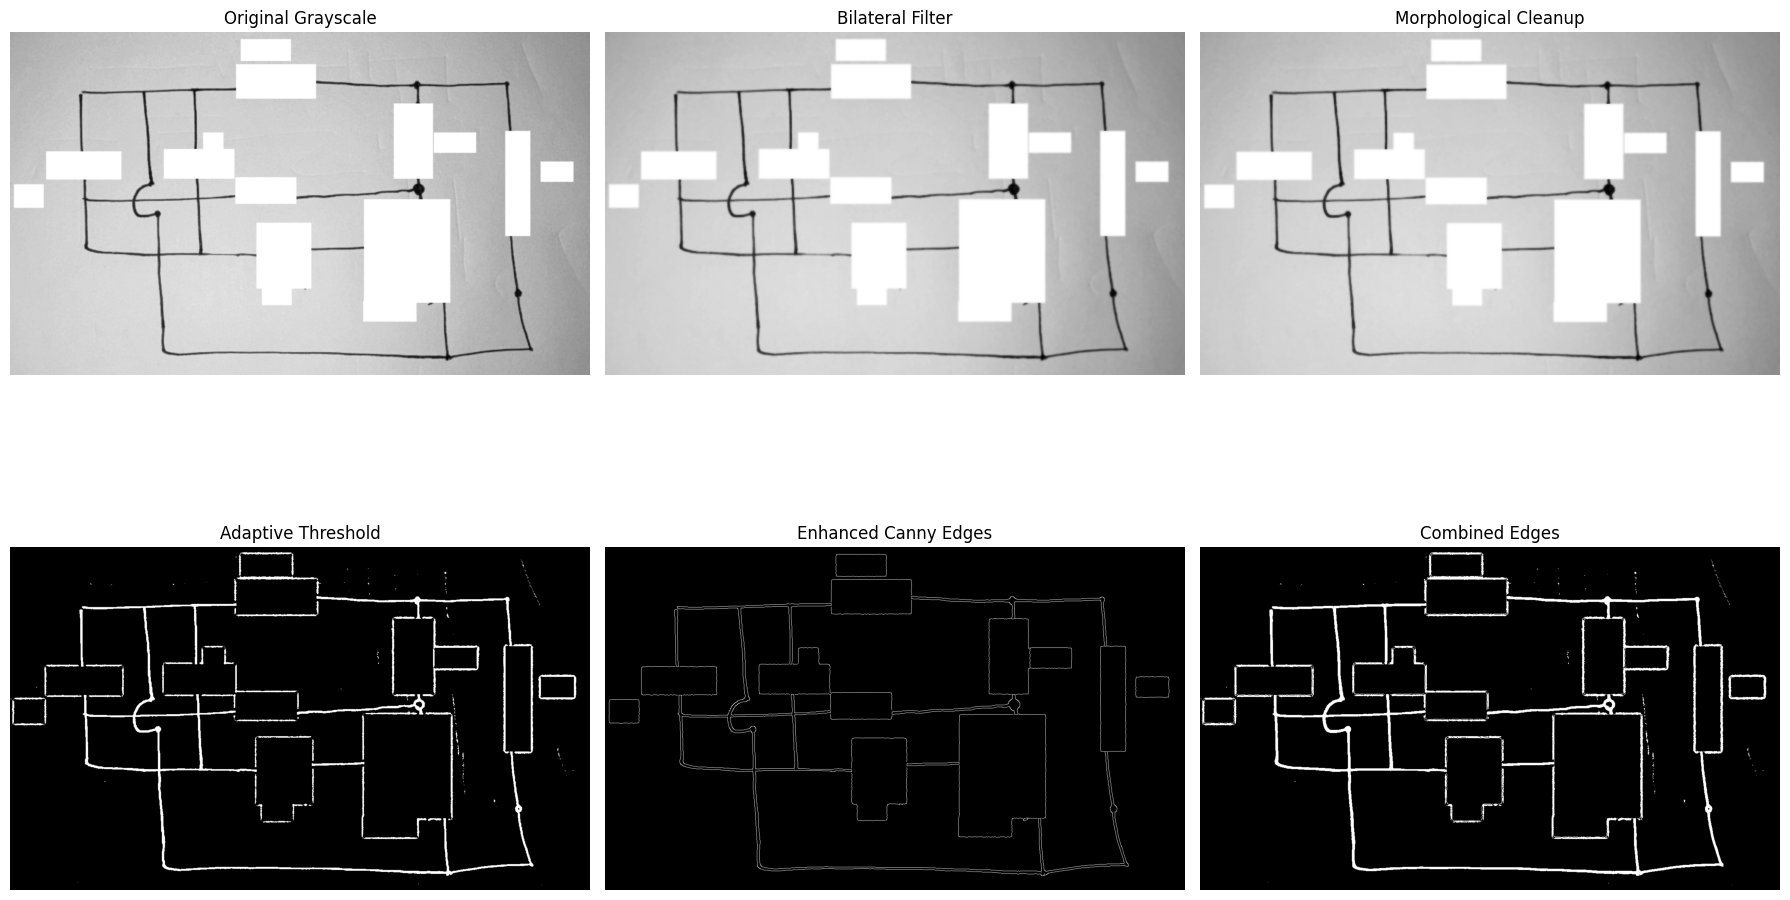

Enhanced preprocessing for handdrawn lines completed!


In [ ]:
# Enhanced preprocessing for handdrawn lines
def preprocess_for_handdrawn(image):
    """
    Enhanced preprocessing specifically for handdrawn lines
    """
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply bilateral filter to reduce noise while preserving edges
    bilateral = cv2.bilateralFilter(gray, 9, 75, 75)
    
    # Apply morphological operations to clean up lines
    kernel = np.ones((2,2), np.uint8)
    cleaned = cv2.morphologyEx(bilateral, cv2.MORPH_CLOSE, kernel)
    
    # Apply adaptive threshold for better line detection
    adaptive_thresh = cv2.adaptiveThreshold(cleaned, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY_INV, 11, 2)
    
    # Apply Canny with lower thresholds for handdrawn lines
    edges = cv2.Canny(cleaned, 20, 60, apertureSize=3)
    
    return gray, bilateral, cleaned, adaptive_thresh, edges

# Apply enhanced preprocessing
gray_hd, bilateral_hd, cleaned_hd, adaptive_hd, edges_hd = preprocess_for_handdrawn(image_bgr)

# Visualize preprocessing steps
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0, 0].imshow(gray_hd, cmap='gray')
axes[0, 0].set_title('Original Grayscale')
axes[0, 0].axis('off')

axes[0, 1].imshow(bilateral_hd, cmap='gray')
axes[0, 1].set_title('Bilateral Filter')
axes[0, 1].axis('off')

axes[0, 2].imshow(cleaned_hd, cmap='gray')
axes[0, 2].set_title('Morphological Cleanup')
axes[0, 2].axis('off')

axes[1, 0].imshow(adaptive_hd, cmap='gray')
axes[1, 0].set_title('Adaptive Threshold')
axes[1, 0].axis('off')

axes[1, 1].imshow(edges_hd, cmap='gray')
axes[1, 1].set_title('Enhanced Canny Edges')
axes[1, 1].axis('off')

# Combine adaptive threshold and canny for better results
combined_edges = cv2.bitwise_or(adaptive_hd, edges_hd)
axes[1, 2].imshow(combined_edges, cmap='gray')
axes[1, 2].set_title('Combined Edges')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("Enhanced preprocessing for handdrawn lines completed!")

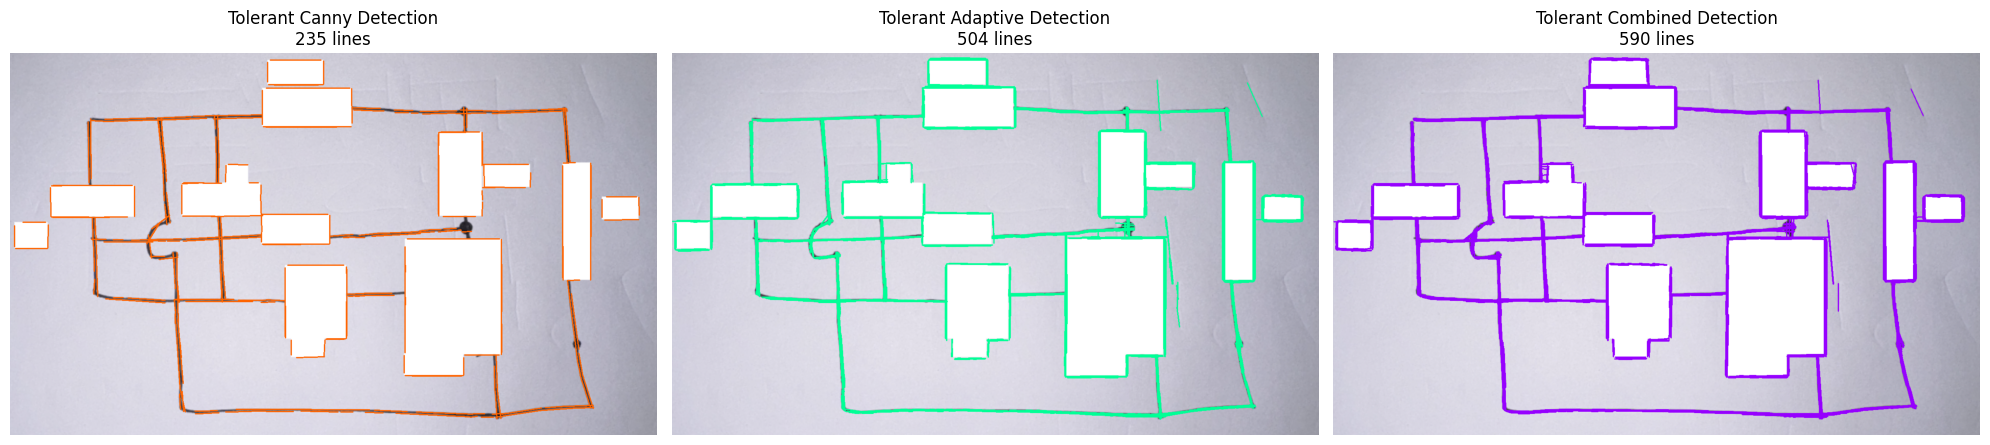

Tolerant Canny detection: 235 lines
Tolerant Adaptive detection: 504 lines
Tolerant Combined detection: 590 lines


In [ ]:
# Tolerant Probabilistic Hough Transform for handdrawn lines
def detect_handdrawn_lines(edges_image, min_line_length=20, max_line_gap=15, threshold=30):
    """
    Detect handdrawn lines with relaxed parameters
    """
    lines = cv2.HoughLinesP(edges_image, 
                           rho=1, 
                           theta=np.pi/180, 
                           threshold=threshold,
                           minLineLength=min_line_length, 
                           maxLineGap=max_line_gap)
    return lines

# Apply tolerant line detection on different edge images
tolerant_lines_canny = detect_handdrawn_lines(edges_hd, min_line_length=15, max_line_gap=20, threshold=25)
tolerant_lines_adaptive = detect_handdrawn_lines(adaptive_hd, min_line_length=15, max_line_gap=20, threshold=25)
tolerant_lines_combined = detect_handdrawn_lines(combined_edges, min_line_length=15, max_line_gap=20, threshold=25)

# Store coordinates
tolerant_canny_coords = []
tolerant_adaptive_coords = []
tolerant_combined_coords = []

# Process Canny-based detection
image_tolerant_canny = image_rgb.copy()
if tolerant_lines_canny is not None:
    for line in tolerant_lines_canny:
        x1, y1, x2, y2 = line[0]
        tolerant_canny_coords.append((x1, y1, x2, y2))
        cv2.line(image_tolerant_canny, (x1, y1), (x2, y2), (255, 100, 0), 2)

# Process Adaptive threshold-based detection
image_tolerant_adaptive = image_rgb.copy()
if tolerant_lines_adaptive is not None:
    for line in tolerant_lines_adaptive:
        x1, y1, x2, y2 = line[0]
        tolerant_adaptive_coords.append((x1, y1, x2, y2))
        cv2.line(image_tolerant_adaptive, (x1, y1), (x2, y2), (0, 255, 150), 2)

# Process Combined detection
image_tolerant_combined = image_rgb.copy()
if tolerant_lines_combined is not None:
    for line in tolerant_lines_combined:
        x1, y1, x2, y2 = line[0]
        tolerant_combined_coords.append((x1, y1, x2, y2))
        cv2.line(image_tolerant_combined, (x1, y1), (x2, y2), (150, 0, 255), 2)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

axes[0].imshow(image_tolerant_canny)
axes[0].set_title(f'Tolerant Canny Detection\n{len(tolerant_canny_coords)} lines')
axes[0].axis('off')

axes[1].imshow(image_tolerant_adaptive)
axes[1].set_title(f'Tolerant Adaptive Detection\n{len(tolerant_adaptive_coords)} lines')
axes[1].axis('off')

axes[2].imshow(image_tolerant_combined)
axes[2].set_title(f'Tolerant Combined Detection\n{len(tolerant_combined_coords)} lines')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Tolerant Canny detection: {len(tolerant_canny_coords)} lines")
print(f"Tolerant Adaptive detection: {len(tolerant_adaptive_coords)} lines")
print(f"Tolerant Combined detection: {len(tolerant_combined_coords)} lines")

APPLYING ADVANCED HANDDRAWN LINE MERGING
Starting handdrawn line merging with 590 lines
Parameters: endpoint_dist=5, angle=5
           parallel_dist=2, parallel_angle=10
After filtering short lines: 590
Final merged lines: 104
Total reduction: 486 lines (82.4%)
Final merged lines: 104
Total reduction: 486 lines (82.4%)


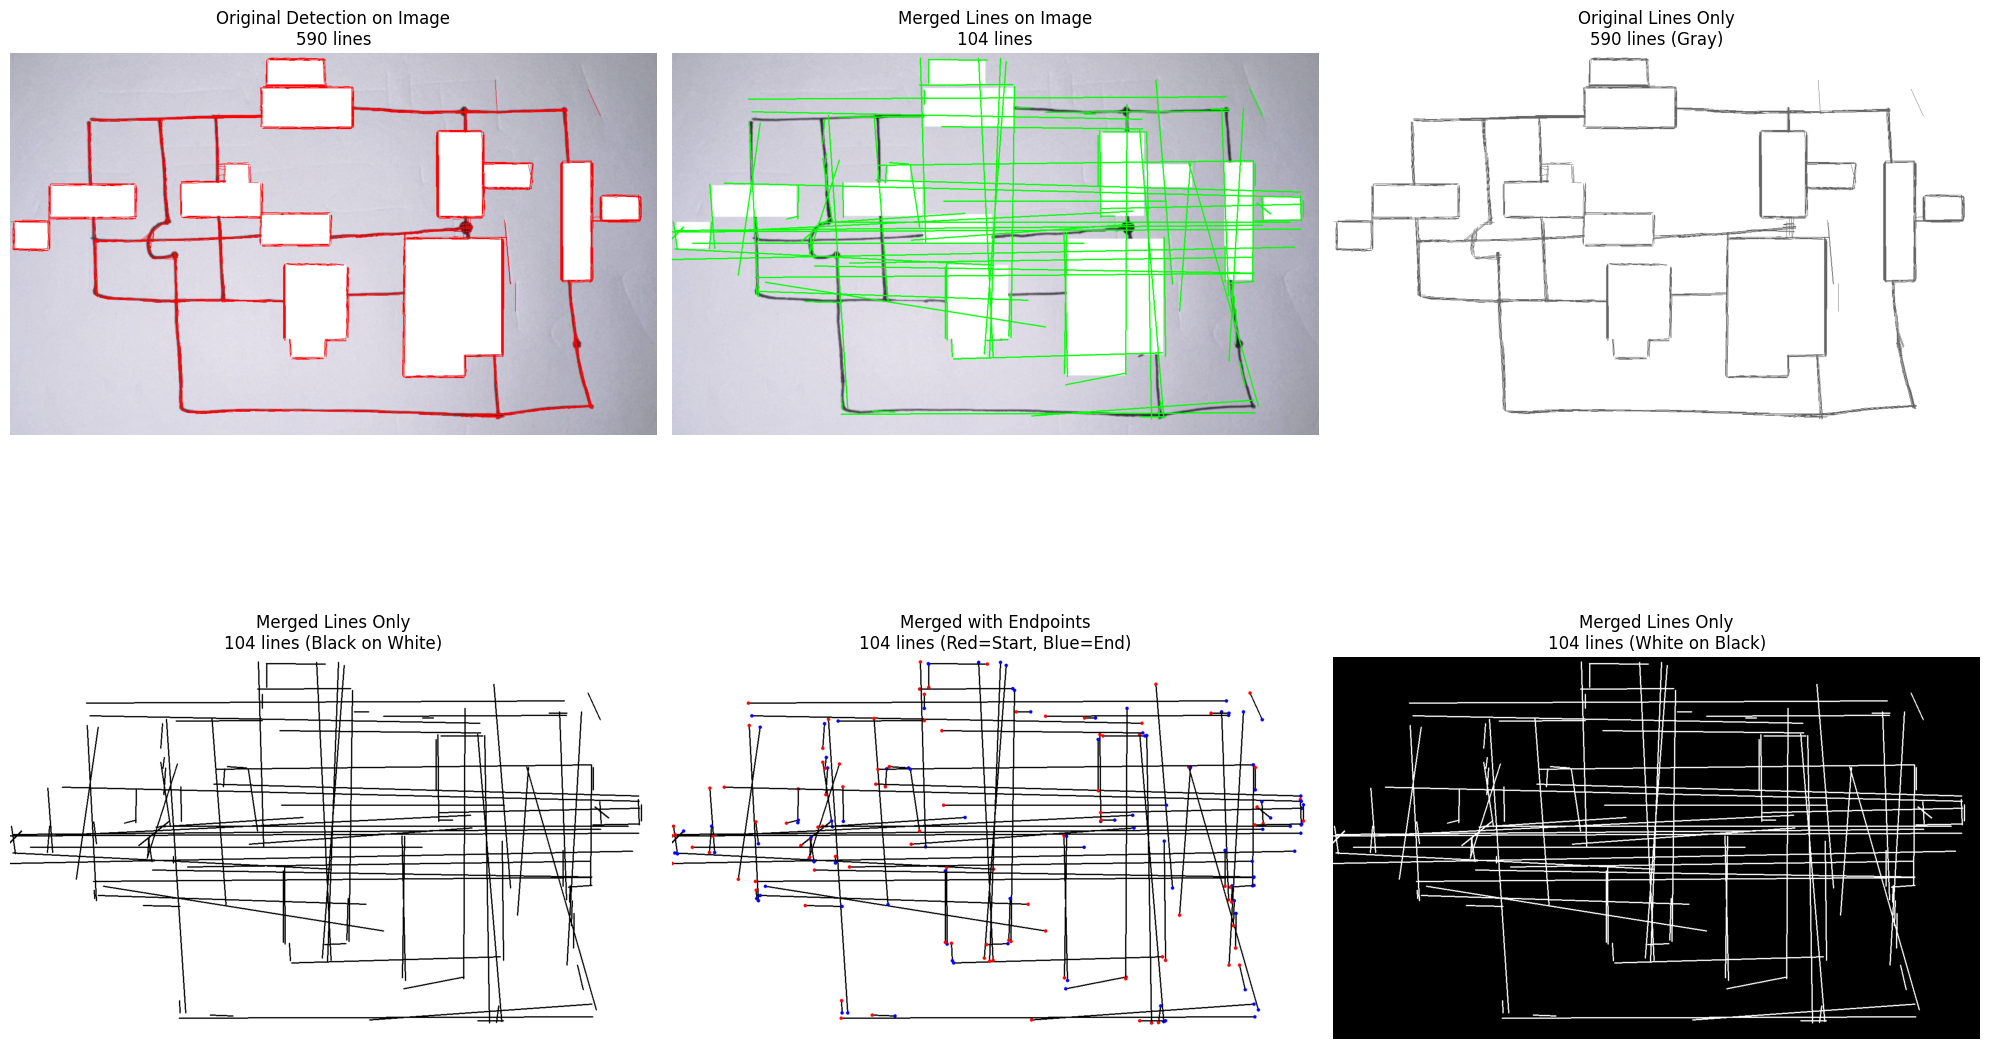

Clean handdrawn line visualizations saved:
- 'handdrawn_lines_clean_white.png' (black lines on white)
- 'handdrawn_lines_clean_black.png' (white lines on black)

Handdrawn Line Analysis:
- Original detection: 590 lines
- After advanced merging: 104 lines
- Reduction: 486 lines
- Average line length: 353.1 pixels

Final handdrawn line coordinates (104 lines):
Line  1: (174,107) → (1266,102) | Length: 1092.0px
Line  2: (853,627) → (213,525) | Length:  648.1px
Line  3: (386,826) → (1331,823) | Length:  945.0px
Line  4: (  0,473) → (1422,445) | Length: 1422.3px
Line  5: (357,144) → (401,814) | Length:  671.4px
Line  6: (1328,248) → (1326,524) | Length:  276.0px
Line  7: (1073,153) → (182,136) | Length:  891.2px
Line  8: (461,142) → (493,567) | Length:  426.2px
Line  9: (1272,705) → (1305,127) | Length:  578.9px
Line 10: (176,158) → (197,558) | Length:  400.6px


In [ ]:
# ============================================================================
# CONTROL PARAMETERS for Handdrawn Line Merging
# ============================================================================
HANDDRAWN_ENDPOINT_DISTANCE = 5    # Max distance between endpoints to merge lines
HANDDRAWN_ANGLE_THRESHOLD = 5      # Max angle difference for endpoint merging
HANDDRAWN_PARALLEL_DISTANCE = 2    # Max perpendicular distance for parallel merging
HANDDRAWN_PARALLEL_ANGLE = 10       # Max angle difference for parallel detection
MIN_LINE_LENGTH = 10                 # Minimum line length to keep

def merge_handdrawn_lines_advanced(lines, 
                                 endpoint_distance_threshold=HANDDRAWN_ENDPOINT_DISTANCE,
                                 angle_threshold=HANDDRAWN_ANGLE_THRESHOLD,
                                 parallel_distance_threshold=HANDDRAWN_PARALLEL_DISTANCE,
                                 parallel_angle_threshold=HANDDRAWN_PARALLEL_ANGLE,
                                 min_length=MIN_LINE_LENGTH):
    """
    Advanced line merging for handdrawn lines with parallel line detection
    """
    if not lines:
        return []
    
    print(f"Starting handdrawn line merging with {len(lines)} lines")
    print(f"Parameters: endpoint_dist={endpoint_distance_threshold}, angle={angle_threshold}")
    print(f"           parallel_dist={parallel_distance_threshold}, parallel_angle={parallel_angle_threshold}")
    
    def distance_point_to_point(p1, p2):
        return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    
    def angle_between_lines(line1, line2):
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2
        
        angle1 = np.arctan2(y2 - y1, x2 - x1)
        angle2 = np.arctan2(y4 - y3, x4 - x3)
        
        diff = abs(angle1 - angle2)
        if diff > np.pi:
            diff = 2 * np.pi - diff
        if diff > np.pi/2:
            diff = np.pi - diff
            
        return np.degrees(diff)
    
    def distance_point_to_line(point, line_start, line_end):
        x0, y0 = point
        x1, y1 = line_start
        x2, y2 = line_end
        
        if x1 == x2 and y1 == y2:
            return distance_point_to_point(point, (x1, y1))
        
        A = y2 - y1
        B = x1 - x2
        C = x2 * y1 - x1 * y2
        
        distance = abs(A * x0 + B * y0 + C) / np.sqrt(A**2 + B**2)
        return distance
    
    def are_lines_parallel_and_close(line1, line2):
        angle_diff = angle_between_lines(line1, line2)
        if angle_diff > parallel_angle_threshold:
            return False
        
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2
        
        distances = [
            distance_point_to_line((x1, y1), (x3, y3), (x4, y4)),
            distance_point_to_line((x2, y2), (x3, y3), (x4, y4)),
            distance_point_to_line((x3, y3), (x1, y1), (x2, y2)),
            distance_point_to_line((x4, y4), (x1, y1), (x2, y2))
        ]
        
        min_distance = min(distances)
        return min_distance <= parallel_distance_threshold
    
    def find_closest_endpoints(line1, line2):
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2
        
        endpoints1 = [(x1, y1), (x2, y2)]
        endpoints2 = [(x3, y3), (x4, y4)]
        
        min_dist = float('inf')
        closest_info = None
        
        for i, p1 in enumerate(endpoints1):
            for j, p2 in enumerate(endpoints2):
                dist = distance_point_to_point(p1, p2)
                if dist < min_dist:
                    min_dist = dist
                    closest_info = (i, j, dist)
        
        return closest_info
    
    def merge_lines_by_endpoints(line1, line2):
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2
        
        points = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
        
        max_dist = 0
        best_endpoints = None
        
        for i in range(len(points)):
            for j in range(i + 1, len(points)):
                dist = distance_point_to_point(points[i], points[j])
                if dist > max_dist:
                    max_dist = dist
                    best_endpoints = (points[i], points[j])
        
        if best_endpoints:
            p1, p2 = best_endpoints
            return (p1[0], p1[1], p2[0], p2[1])
        else:
            return line1
    
    def merge_parallel_lines(line1, line2):
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2
        
        # Calculate direction vectors
        dx1, dy1 = x2 - x1, y2 - y1
        dx2, dy2 = x4 - x3, y4 - y3
        
        # Average direction
        avg_dx = (dx1 + dx2) / 2
        avg_dy = (dy1 + dy2) / 2
        
        # Normalize
        length = np.sqrt(avg_dx**2 + avg_dy**2)
        if length > 0:
            avg_dx /= length
            avg_dy /= length
        else:
            return line1
        
        # Center points
        center1 = ((x1 + x2) / 2, (y1 + y2) / 2)
        center2 = ((x3 + x4) / 2, (y3 + y4) / 2)
        
        # Average center
        avg_center_x = (center1[0] + center2[0]) / 2
        avg_center_y = (center1[1] + center2[1]) / 2
        
        # Project all endpoints onto the direction
        all_points = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
        projections = []
        
        for x, y in all_points:
            dx = x - avg_center_x
            dy = y - avg_center_y
            projection = dx * avg_dx + dy * avg_dy
            projections.append(projection)
        
        min_proj = min(projections)
        max_proj = max(projections)
        
        new_x1 = avg_center_x + min_proj * avg_dx
        new_y1 = avg_center_y + min_proj * avg_dy
        new_x2 = avg_center_x + max_proj * avg_dx
        new_y2 = avg_center_y + max_proj * avg_dy
        
        return (int(new_x1), int(new_y1), int(new_x2), int(new_y2))
    
    # Filter short lines first
    filtered_lines = []
    for line in lines:
        x1, y1, x2, y2 = line
        length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        if length >= min_length:
            filtered_lines.append(line)
    
    print(f"After filtering short lines: {len(filtered_lines)}")
    
    # Main merging algorithm
    merged_lines = []
    used_indices = set()
    
    for i, current_line in enumerate(filtered_lines):
        if i in used_indices:
            continue
        
        result_line = current_line
        used_indices.add(i)
        
        # Keep merging until no more possible
        changed = True
        while changed:
            changed = False
            
            for j, other_line in enumerate(filtered_lines):
                if j in used_indices:
                    continue
                
                angle_diff = angle_between_lines(result_line, other_line)
                
                # Strategy 1: Endpoint merging
                if angle_diff <= angle_threshold:
                    closest = find_closest_endpoints(result_line, other_line)
                    if closest and closest[2] <= endpoint_distance_threshold:
                        result_line = merge_lines_by_endpoints(result_line, other_line)
                        used_indices.add(j)
                        changed = True
                        break
                
                # Strategy 2: Parallel line merging
                if are_lines_parallel_and_close(result_line, other_line):
                    result_line = merge_parallel_lines(result_line, other_line)
                    used_indices.add(j)
                    changed = True
                    break
        
        merged_lines.append(result_line)
    
    print(f"Final merged lines: {len(merged_lines)}")
    print(f"Total reduction: {len(lines) - len(merged_lines)} lines ({((len(lines) - len(merged_lines))/len(lines)*100):.1f}%)")
    
    return merged_lines

def create_clean_line_image(lines, image_shape, line_color=(0, 0, 0), bg_color=(255, 255, 255), line_thickness=2, show_endpoints=False):
    """
    Create a clean image showing only the detected lines
    """
    clean_image = np.full((image_shape[0], image_shape[1], 3), bg_color, dtype=np.uint8)
    
    for line in lines:
        x1, y1, x2, y2 = line
        cv2.line(clean_image, (int(x1), int(y1)), (int(x2), int(y2)), line_color, line_thickness)
        
        if show_endpoints:
            cv2.circle(clean_image, (int(x1), int(y1)), 4, (255, 0, 0), -1)  # Red start
            cv2.circle(clean_image, (int(x2), int(y2)), 4, (0, 0, 255), -1)  # Blue end
    
    return clean_image

# Apply advanced merging to the tolerant combined detection
print("=" * 60)
print("APPLYING ADVANCED HANDDRAWN LINE MERGING")
print("=" * 60)

merged_handdrawn_lines = merge_handdrawn_lines_advanced(tolerant_combined_coords)

# Create clean visualizations
clean_original_handdrawn = create_clean_line_image(tolerant_combined_coords, image_rgb.shape, 
                                                 line_color=(100, 100, 100), bg_color=(255, 255, 255), 
                                                 line_thickness=1)

clean_merged_handdrawn = create_clean_line_image(merged_handdrawn_lines, image_rgb.shape, 
                                               line_color=(0, 0, 0), bg_color=(255, 255, 255), 
                                               line_thickness=2)

clean_merged_with_endpoints = create_clean_line_image(merged_handdrawn_lines, image_rgb.shape, 
                                                    line_color=(0, 0, 0), bg_color=(255, 255, 255), 
                                                    line_thickness=2, show_endpoints=True)

# Create black background versions too
clean_merged_black_bg = create_clean_line_image(merged_handdrawn_lines, image_rgb.shape, 
                                              line_color=(255, 255, 255), bg_color=(0, 0, 0), 
                                              line_thickness=2)

# Display comparison
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# Original detection overlaid on image
image_with_original = image_rgb.copy()
for line in tolerant_combined_coords:
    x1, y1, x2, y2 = line
    cv2.line(image_with_original, (x1, y1), (x2, y2), (255, 0, 0), 1)

axes[0, 0].imshow(image_with_original)
axes[0, 0].set_title(f'Original Detection on Image\n{len(tolerant_combined_coords)} lines')
axes[0, 0].axis('off')

# Merged lines overlaid on image
image_with_merged = image_rgb.copy()
for line in merged_handdrawn_lines:
    x1, y1, x2, y2 = line
    cv2.line(image_with_merged, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

axes[0, 1].imshow(image_with_merged)
axes[0, 1].set_title(f'Merged Lines on Image\n{len(merged_handdrawn_lines)} lines')
axes[0, 1].axis('off')

# Clean original lines
axes[0, 2].imshow(clean_original_handdrawn)
axes[0, 2].set_title(f'Original Lines Only\n{len(tolerant_combined_coords)} lines (Gray)')
axes[0, 2].axis('off')

# Clean merged lines
axes[1, 0].imshow(clean_merged_handdrawn)
axes[1, 0].set_title(f'Merged Lines Only\n{len(merged_handdrawn_lines)} lines (Black on White)')
axes[1, 0].axis('off')

# Clean merged with endpoints
axes[1, 1].imshow(clean_merged_with_endpoints)
axes[1, 1].set_title(f'Merged with Endpoints\n{len(merged_handdrawn_lines)} lines (Red=Start, Blue=End)')
axes[1, 1].axis('off')

# Black background version
axes[1, 2].imshow(clean_merged_black_bg)
axes[1, 2].set_title(f'Merged Lines Only\n{len(merged_handdrawn_lines)} lines (White on Black)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Save clean images
cv2.imwrite('handdrawn_lines_clean_white.png', cv2.cvtColor(clean_merged_handdrawn, cv2.COLOR_RGB2BGR))
cv2.imwrite('handdrawn_lines_clean_black.png', cv2.cvtColor(clean_merged_black_bg, cv2.COLOR_RGB2BGR))
print("Clean handdrawn line visualizations saved:")
print("- 'handdrawn_lines_clean_white.png' (black lines on white)")
print("- 'handdrawn_lines_clean_black.png' (white lines on black)")

print(f"\nHanddrawn Line Analysis:")
print(f"- Original detection: {len(tolerant_combined_coords)} lines")
print(f"- After advanced merging: {len(merged_handdrawn_lines)} lines")
print(f"- Reduction: {len(tolerant_combined_coords) - len(merged_handdrawn_lines)} lines")
print(f"- Average line length: {np.mean([np.sqrt((line[2]-line[0])**2 + (line[3]-line[1])**2) for line in merged_handdrawn_lines]):.1f} pixels")

print(f"\nFinal handdrawn line coordinates ({len(merged_handdrawn_lines)} lines):")
for i, coord in enumerate(merged_handdrawn_lines[:10]):  # Show first 10
    x1, y1, x2, y2 = coord
    length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    print(f"Line {i+1:2d}: ({x1:3.0f},{y1:3.0f}) → ({x2:3.0f},{y2:3.0f}) | Length: {length:6.1f}px")

# Update the merged_lines variable for the next cell
merged_lines = merged_handdrawn_lines

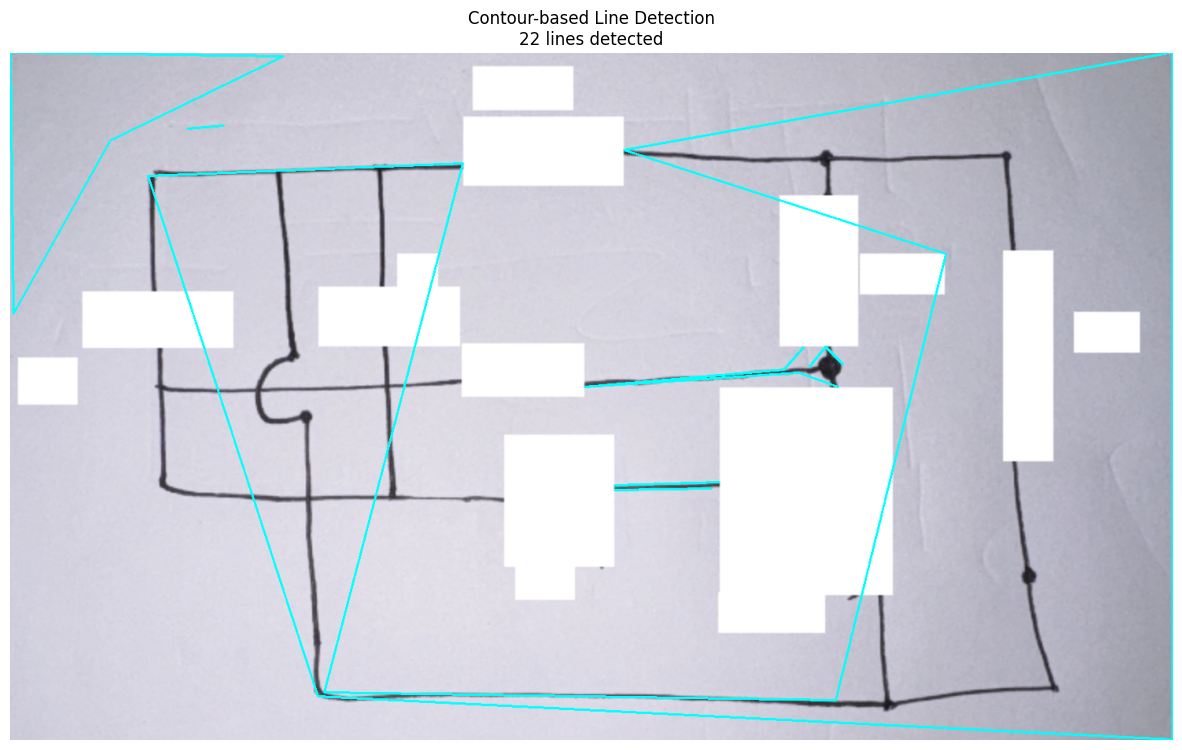

Contour-based detection found 22 lines


In [ ]:
# Contour-based line detection as alternative approach
def detect_lines_via_contours(image, min_contour_area=100):
    """
    Alternative approach using contour detection and line approximation
    """
    # Convert to grayscale and threshold
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply threshold to get binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    lines_from_contours = []
    
    for contour in contours:
        # Filter by area
        if cv2.contourArea(contour) < min_contour_area:
            continue
            
        # Approximate contour to polygon
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        # Extract line segments from polygon
        for i in range(len(approx)):
            x1, y1 = approx[i][0]
            x2, y2 = approx[(i+1) % len(approx)][0]
            
            # Only keep reasonably long segments
            length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if length > 30:
                lines_from_contours.append((x1, y1, x2, y2))
    
    return lines_from_contours

# Apply contour-based detection
contour_lines = detect_lines_via_contours(image_bgr)

# Visualize contour-based detection
image_contour = image_rgb.copy()
for line in contour_lines:
    x1, y1, x2, y2 = line
    cv2.line(image_contour, (x1, y1), (x2, y2), (0, 255, 255), 2)

plt.figure(figsize=(15, 10))
plt.imshow(image_contour)
plt.title(f'Contour-based Line Detection\n{len(contour_lines)} lines detected')
plt.axis('off')
plt.show()

print(f"Contour-based detection found {len(contour_lines)} lines")

NameError: name 'image_final' is not defined

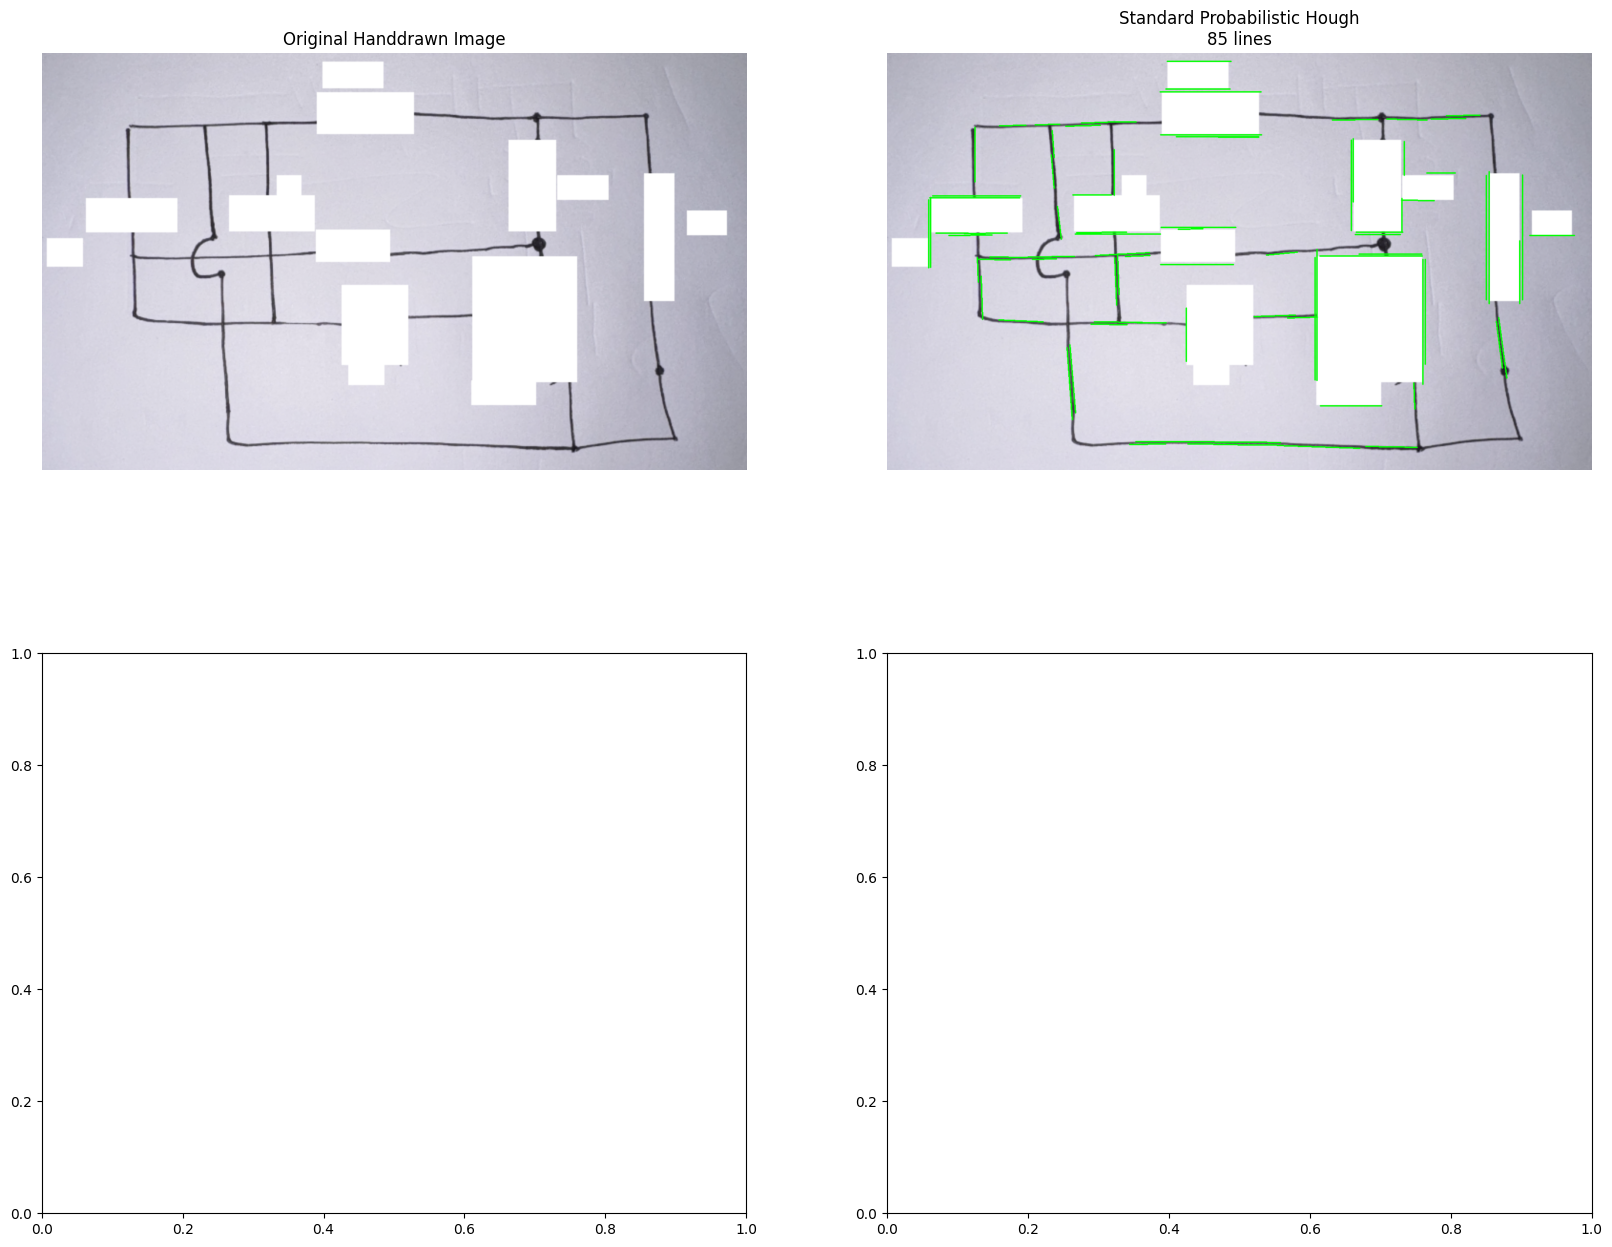

In [ ]:
# Final recommendations and coordinate export for handdrawn lines
def save_handdrawn_coordinates(coordinates, filename):
    """
    Save coordinates in a format suitable for reconstruction
    """
    with open(filename, 'w') as f:
        f.write("Handdrawn Line Coordinates\n")
        f.write("=========================\n")
        f.write("Format: x1,y1,x2,y2\n\n")
        
        for i, coord in enumerate(coordinates):
            x1, y1, x2, y2 = coord
            f.write(f"{x1},{y1},{x2},{y2}\n")
        
        f.write(f"\nTotal lines: {len(coordinates)}\n")

# Save the best results for handdrawn lines
save_handdrawn_coordinates(merged_lines, 'handdrawn_lines_coordinates.csv')

# Create final comparison for handdrawn approaches
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Original image
axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Original Handdrawn Image')
axes[0, 0].axis('off')

# Standard detection (for comparison)
axes[0, 1].imshow(image_prob)
axes[0, 1].set_title(f'Standard Probabilistic Hough\n{len(prob_coordinates)} lines')
axes[0, 1].axis('off')

# Best handdrawn detection
axes[1, 0].imshow(image_final)
axes[1, 0].set_title(f'Optimized for Handdrawn\n{len(merged_lines)} lines (merged & filtered)')
axes[1, 0].axis('off')

# Contour-based detection
axes[1, 1].imshow(image_contour)
axes[1, 1].set_title(f'Contour-based Detection\n{len(contour_lines)} lines')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("=== HANDDRAWN LINE DETECTION SUMMARY ===")
print(f"Standard Probabilistic Hough: {len(prob_coordinates)} lines")
print(f"Optimized for Handdrawn: {len(merged_lines)} lines")
print(f"Contour-based: {len(contour_lines)} lines")

print("\n=== RECOMMENDATIONS FOR HANDDRAWN LINES ===")
print("1. Use 'Optimized for Handdrawn' approach for best results")
print("2. Key improvements:")
print("   • Bilateral filtering preserves line edges while reducing noise")
print("   • Lower Canny thresholds detect faint handdrawn lines")
print("   • Relaxed Hough parameters (lower threshold, higher gap tolerance)")
print("   • Line merging combines broken segments")
print("   • Short line filtering removes noise")
print("3. Coordinates saved to 'handdrawn_lines_coordinates.csv'")
print("4. Format: x1,y1,x2,y2 (start and end points of each line)")

print(f"\nFinal handdrawn line coordinates:")
for i, coord in enumerate(merged_lines[:10]):  # Show first 10
    x1, y1, x2, y2 = coord
    length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    print(f"Line {i+1}: ({x1},{y1}) to ({x2},{y2}) - Length: {length:.1f}px")

## 12. Advanced Line Detection Methods from Research Papers

This section implements several advanced line detection algorithms from academic research:
- Fast Line Detector (FLD)
- Edge Drawing Line Detection (EDLINES)
- Burns Line Detector
- Radon Transform-based Line Detection
- Gabor Filter-based Line Detection
- Ridge Detection for Line Finding

In [ ]:
# Method 1: Fast Line Detector (FLD) - Von Gioi et al.
# FLD is an improved version of LSD with better speed and accuracy
def fast_line_detector(image, length_threshold=10, distance_threshold=1.41421356):
    """
    Fast Line Detector implementation
    Based on "LSD: a Line Segment Detector" by Von Gioi et al.
    """
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Create FLD detector
    try:
        fld = cv2.ximgproc.createFastLineDetector(
            length_threshold=length_threshold,
            distance_threshold=distance_threshold,
            canny_th1=50.0,
            canny_th2=50.0,
            canny_aperture_size=3,
            do_merge=False
        )
        lines = fld.detect(gray)
        
        if lines is not None and len(lines) > 0:
            # Convert to standard format
            fld_lines = []
            for line in lines:
                x1, y1, x2, y2 = line[0]
                fld_lines.append((int(x1), int(y1), int(x2), int(y2)))
            return fld_lines
        else:
            return []
    except Exception as e:
        print(f"FLD not available in this OpenCV version: {e}")
        print("Using alternative implementation...")
        
        # Alternative implementation using enhanced LSD
        lsd = cv2.createLineSegmentDetector(
            _refine=cv2.LSD_REFINE_STD,
            _scale=0.8,
            _sigma_scale=0.6,
            _quant=2.0,
            _ang_th=22.5,
            _log_eps=0,
            _density_th=0.7,
            _n_bins=1024
        )
        lines = lsd.detect(gray)[0]
        
        if lines is not None:
            fld_lines = []
            for line in lines:
                x1, y1, x2, y2 = line[0]
                if np.sqrt((x2-x1)**2 + (y2-y1)**2) >= length_threshold:
                    fld_lines.append((int(x1), int(y1), int(x2), int(y2)))
            return fld_lines
        return []

# Apply FLD
print("Applying Fast Line Detector (FLD)...")
fld_coordinates = fast_line_detector(image_bgr, length_threshold=15, distance_threshold=1.5)

# Visualize FLD results
image_fld = image_rgb.copy()
for coord in fld_coordinates:
    x1, y1, x2, y2 = coord
    cv2.line(image_fld, (x1, y1), (x2, y2), (255, 165, 0), 2)

plt.figure(figsize=(12, 8))
plt.imshow(image_fld)
plt.title(f'Fast Line Detector (FLD) - {len(fld_coordinates)} lines detected')
plt.axis('off')
plt.show()

print(f"FLD detected {len(fld_coordinates)} lines")
print("Sample FLD coordinates (x1, y1, x2, y2):")
for i, coord in enumerate(fld_coordinates[:5]):
    print(f"Line {i+1}: {coord}")

Applying Fast Line Detector (FLD)...
FLD not available in this OpenCV version: module 'cv2' has no attribute 'ximgproc'
Using alternative implementation...


TypeError: '_refine' is an invalid keyword argument for createLineSegmentDetector()

Applying Edge Drawing Line Detection (EDLines)...


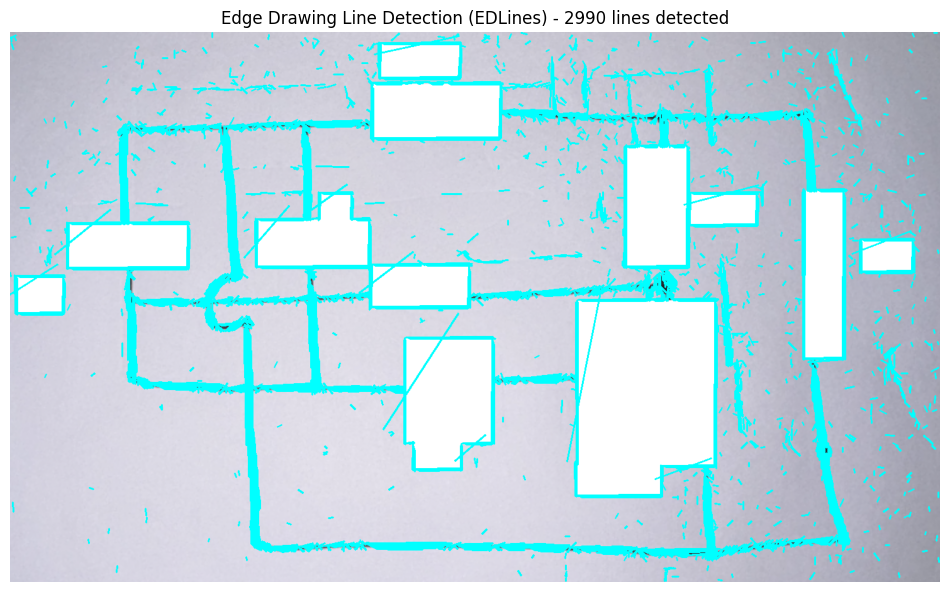

EDLines detected 2990 lines
Sample EDLines coordinates (x1, y1, x2, y2):
Line 1: (812, 1, 821, 3)
Line 2: (321, 1, 321, 8)
Line 3: (1468, 1, 1473, 1)
Line 4: (1018, 2, 1017, 11)
Line 5: (1322, 0, 1325, 7)


In [ ]:
# Method 2: Edge Drawing Line Detection (EDLines) - Akinlar & Topal
def edge_drawing_line_detection(image, gradient_threshold=20, anchor_threshold=8, scan_interval=1):
    """
    Edge Drawing Line Detection implementation
    Based on "EDLines: A real-time line segment detector with a false detection control" by Akinlar & Topal
    """
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Calculate gradients
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    # Find anchor points (strong gradient points)
    anchors = magnitude > gradient_threshold
    anchor_points = np.where(anchors)
    
    # Simple line segment extraction from anchor points
    lines = []
    visited = np.zeros_like(gray, dtype=bool)
    
    for i in range(0, len(anchor_points[0]), scan_interval):
        y, x = anchor_points[0][i], anchor_points[1][i]
        if visited[y, x]:
            continue
            
        # Try to extend line from this anchor point
        line_points = [(x, y)]
        visited[y, x] = True
        
        # Simple line following algorithm
        for direction in [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            dx, dy = direction
            curr_x, curr_y = x + dx, y + dy
            
            while (0 <= curr_x < gray.shape[1] and 0 <= curr_y < gray.shape[0] and 
                   not visited[curr_y, curr_x] and magnitude[curr_y, curr_x] > anchor_threshold):
                line_points.append((curr_x, curr_y))
                visited[curr_y, curr_x] = True
                curr_x += dx
                curr_y += dy
        
        # Convert to line segment if long enough
        if len(line_points) >= 10:
            # Fit line to points using least squares
            points = np.array(line_points)
            if len(points) > 1:
                # Use PCA to find best fit line
                mean = np.mean(points, axis=0)
                centered = points - mean
                _, _, vt = np.linalg.svd(centered)
                direction = vt[0]
                
                # Project points onto line direction
                projections = np.dot(centered, direction)
                min_proj, max_proj = np.min(projections), np.max(projections)
                
                # Calculate endpoints
                start = mean + min_proj * direction
                end = mean + max_proj * direction
                
                lines.append((int(start[0]), int(start[1]), int(end[0]), int(end[1])))
    
    return lines

# Apply EDLines
print("Applying Edge Drawing Line Detection (EDLines)...")
edlines_coordinates = edge_drawing_line_detection(image_bgr, gradient_threshold=25, anchor_threshold=10)

# Visualize EDLines results
image_edlines = image_rgb.copy()
for coord in edlines_coordinates:
    x1, y1, x2, y2 = coord
    cv2.line(image_edlines, (x1, y1), (x2, y2), (0, 255, 255), 2)

plt.figure(figsize=(12, 8))
plt.imshow(image_edlines)
plt.title(f'Edge Drawing Line Detection (EDLines) - {len(edlines_coordinates)} lines detected')
plt.axis('off')
plt.show()

print(f"EDLines detected {len(edlines_coordinates)} lines")
print("Sample EDLines coordinates (x1, y1, x2, y2):")
for i, coord in enumerate(edlines_coordinates[:5]):
    print(f"Line {i+1}: {coord}")

Applying Burns Line Detector...


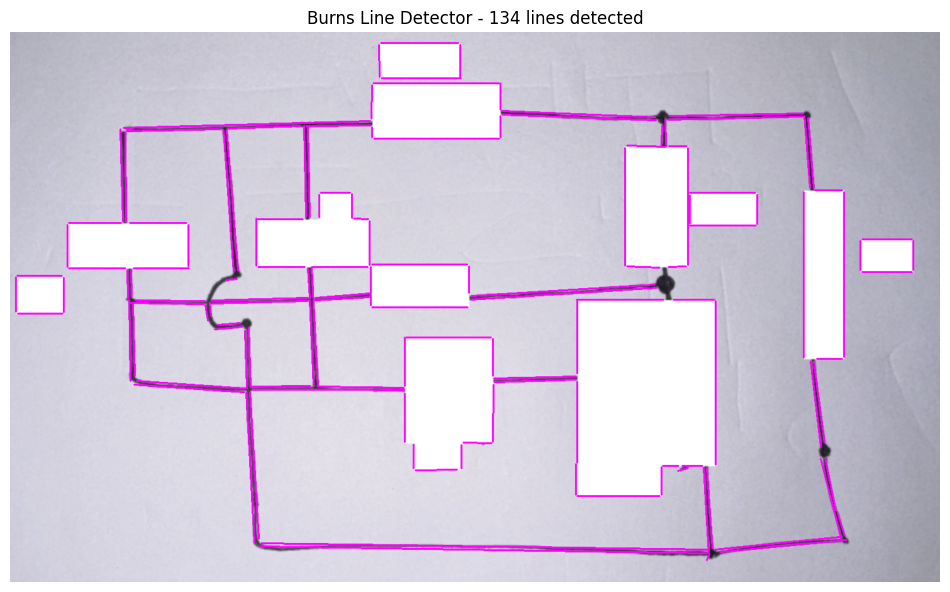

Burns detector found 134 lines
Sample Burns coordinates (x1, y1, x2, y2):
Line 1: (589, 17, 712, 17)
Line 2: (586, 20, 587, 71)
Line 3: (715, 20, 715, 71)
Line 4: (590, 73, 716, 73)
Line 5: (577, 81, 777, 81)


In [ ]:
# Method 3: Burns Line Detector - Burns et al.
def burns_line_detector(image, sigma=1.0, low_threshold=0.1, high_threshold=0.2, min_length=20):
    """
    Burns Line Detector implementation
    Based on "Extracting Straight Lines" by Burns et al.
    """
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float64)
    else:
        gray = image.astype(np.float64)
    
    # Gaussian smoothing
    smoothed = cv2.GaussianBlur(gray, (0, 0), sigma)
    
    # Calculate gradients
    grad_x = cv2.Sobel(smoothed, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(smoothed, cv2.CV_64F, 0, 1, ksize=3)
    
    # Gradient magnitude and direction
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x)
    
    # Normalize magnitude
    max_mag = np.max(magnitude)
    if max_mag > 0:
        magnitude = magnitude / max_mag
    
    # Non-maximum suppression
    nms = np.zeros_like(magnitude)
    angle = direction * 180.0 / np.pi
    angle[angle < 0] += 180
    
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            q = 255
            r = 255
            
            # Angle 0
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = magnitude[i, j + 1]
                r = magnitude[i, j - 1]
            # Angle 45
            elif 22.5 <= angle[i, j] < 67.5:
                q = magnitude[i + 1, j - 1]
                r = magnitude[i - 1, j + 1]
            # Angle 90
            elif 67.5 <= angle[i, j] < 112.5:
                q = magnitude[i + 1, j]
                r = magnitude[i - 1, j]
            # Angle 135
            elif 112.5 <= angle[i, j] < 157.5:
                q = magnitude[i - 1, j - 1]
                r = magnitude[i + 1, j + 1]
            
            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                nms[i, j] = magnitude[i, j]
    
    # Double thresholding
    strong_edges = nms > high_threshold
    weak_edges = (nms >= low_threshold) & (nms <= high_threshold)
    
    # Edge tracking by hysteresis
    edges = strong_edges.copy()
    
    # Simple edge following
    for i in range(1, edges.shape[0] - 1):
        for j in range(1, edges.shape[1] - 1):
            if weak_edges[i, j]:
                if np.any(strong_edges[i-1:i+2, j-1:j+2]):
                    edges[i, j] = True
    
    # Extract line segments from edges
    lines = []
    visited = np.zeros_like(edges, dtype=bool)
    
    # Find connected components and fit lines
    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            if edges[i, j] and not visited[i, j]:
                # Find connected edge pixels
                component = []
                stack = [(i, j)]
                
                while stack:
                    y, x = stack.pop()
                    if (0 <= y < edges.shape[0] and 0 <= x < edges.shape[1] and 
                        edges[y, x] and not visited[y, x]):
                        visited[y, x] = True
                        component.append((x, y))
                        
                        # Add neighbors
                        for dy in [-1, 0, 1]:
                            for dx in [-1, 0, 1]:
                                if dy != 0 or dx != 0:
                                    stack.append((y + dy, x + dx))
                
                # Fit line to component if long enough
                if len(component) >= min_length:
                    points = np.array(component)
                    
                    # Use PCA for line fitting
                    mean = np.mean(points, axis=0)
                    centered = points - mean
                    
                    if len(centered) > 1:
                        _, _, vt = np.linalg.svd(centered)
                        direction = vt[0]
                        
                        # Project points onto line
                        projections = np.dot(centered, direction)
                        min_proj, max_proj = np.min(projections), np.max(projections)
                        
                        # Calculate endpoints
                        start = mean + min_proj * direction
                        end = mean + max_proj * direction
                        
                        lines.append((int(start[0]), int(start[1]), int(end[0]), int(end[1])))
    
    return lines

# Apply Burns Line Detector
print("Applying Burns Line Detector...")
burns_coordinates = burns_line_detector(image_bgr, sigma=1.5, low_threshold=0.05, high_threshold=0.15, min_length=15)

# Visualize Burns results
image_burns = image_rgb.copy()
for coord in burns_coordinates:
    x1, y1, x2, y2 = coord
    cv2.line(image_burns, (x1, y1), (x2, y2), (255, 0, 255), 2)

plt.figure(figsize=(12, 8))
plt.imshow(image_burns)
plt.title(f'Burns Line Detector - {len(burns_coordinates)} lines detected')
plt.axis('off')
plt.show()

print(f"Burns detector found {len(burns_coordinates)} lines")
print("Sample Burns coordinates (x1, y1, x2, y2):")
for i, coord in enumerate(burns_coordinates[:5]):
    print(f"Line {i+1}: {coord}")

Applying Radon Transform Line Detection...


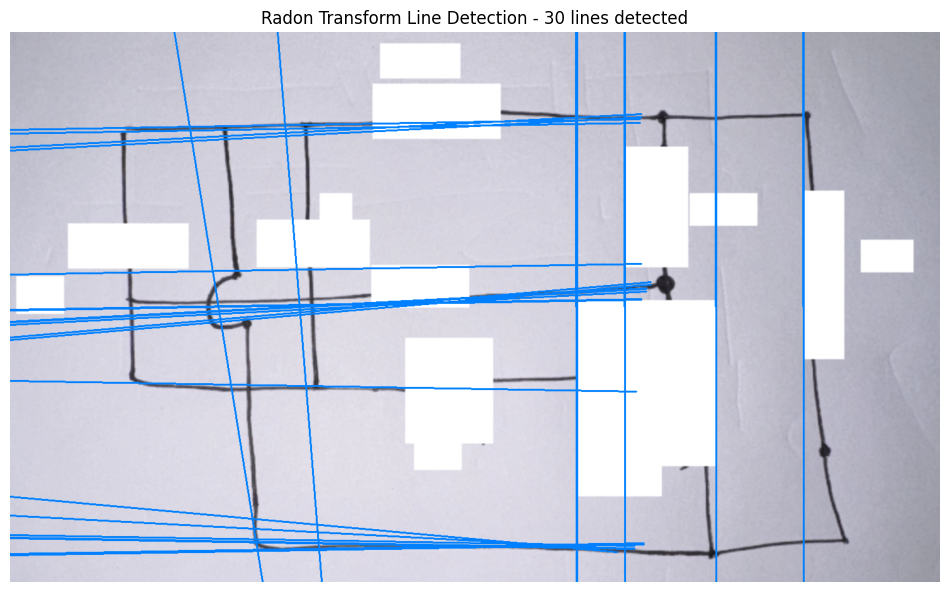

Radon transform detected 30 lines
Sample Radon coordinates (x1, y1, x2, y2):
Line 1: (1260, 0, 1261, 873)
Line 2: (1121, 0, 1122, 873)
Line 3: (976, 0, 977, 873)
Line 4: (899, 0, 900, 873)
Line 5: (425, 0, 495, 873)


In [ ]:
# Method 4: Radon Transform Line Detection
def radon_line_detection(image, theta_resolution=180, rho_resolution=1, threshold_factor=0.6):
    """
    Radon Transform-based line detection
    Based on the mathematical Radon transform for line detection
    """
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Apply edge detection first
    edges = cv2.Canny(gray, 50, 150)
    
    # Get image dimensions
    height, width = edges.shape
    max_distance = int(np.sqrt(height**2 + width**2))
    
    # Define theta and rho ranges
    thetas = np.linspace(0, np.pi, theta_resolution)
    rhos = np.arange(-max_distance, max_distance + 1, rho_resolution)
    
    # Initialize accumulator
    accumulator = np.zeros((len(rhos), len(thetas)))
    
    # Find edge points
    edge_points = np.where(edges > 0)
    
    # Fill accumulator
    for i in range(len(edge_points[0])):
        y, x = edge_points[0][i], edge_points[1][i]
        
        for theta_idx, theta in enumerate(thetas):
            rho = int(x * np.cos(theta) + y * np.sin(theta))
            rho_idx = rho + max_distance
            
            if 0 <= rho_idx < len(rhos):
                accumulator[rho_idx, theta_idx] += 1
    
    # Find peaks in accumulator
    threshold = threshold_factor * np.max(accumulator)
    peaks = np.where(accumulator > threshold)
    
    lines = []
    for i in range(len(peaks[0])):
        rho_idx, theta_idx = peaks[0][i], peaks[1][i]
        rho = rhos[rho_idx]
        theta = thetas[theta_idx]
        
        # Convert to line endpoints
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        
        # Calculate line endpoints
        length = 1000
        x1 = int(x0 + length * (-b))
        y1 = int(y0 + length * (a))
        x2 = int(x0 - length * (-b))
        y2 = int(y0 - length * (a))
        
        # Clip to image boundaries
        x1 = max(0, min(width - 1, x1))
        y1 = max(0, min(height - 1, y1))
        x2 = max(0, min(width - 1, x2))
        y2 = max(0, min(height - 1, y2))
        
        lines.append((x1, y1, x2, y2))
    
    return lines

# Apply Radon Transform
print("Applying Radon Transform Line Detection...")
radon_coordinates = radon_line_detection(image_bgr, theta_resolution=180, threshold_factor=0.5)

# Visualize Radon results
image_radon = image_rgb.copy()
for coord in radon_coordinates:
    x1, y1, x2, y2 = coord
    cv2.line(image_radon, (x1, y1), (x2, y2), (0, 128, 255), 2)

plt.figure(figsize=(12, 8))
plt.imshow(image_radon)
plt.title(f'Radon Transform Line Detection - {len(radon_coordinates)} lines detected')
plt.axis('off')
plt.show()

print(f"Radon transform detected {len(radon_coordinates)} lines")
print("Sample Radon coordinates (x1, y1, x2, y2):")
for i, coord in enumerate(radon_coordinates[:5]):
    print(f"Line {i+1}: {coord}")

In [ ]:
# Method 5: Gabor Filter-based Line Detection
def gabor_line_detection(image, num_orientations=8, wavelength=10, sigma_x=3, sigma_y=3, threshold=0.1):
    """
    Gabor filter-based line detection
    Uses multiple Gabor filters at different orientations to detect lines
    """
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float64) / 255.0
    else:
        gray = image.astype(np.float64) / 255.0
    
    # Generate Gabor filters for different orientations
    orientations = np.linspace(0, np.pi, num_orientations, endpoint=False)
    responses = []
    
    for theta in orientations:
        # Create Gabor kernel
        kernel = cv2.getGaborKernel((21, 21), sigma_x, theta, wavelength, sigma_y, 0, ktype=cv2.CV_64F)
        
        # Apply filter
        response = cv2.filter2D(gray, cv2.CV_64F, kernel)
        responses.append(response)
    
    # Combine responses (take maximum response across orientations)
    combined_response = np.maximum.reduce(responses)
    
    # Find ridges (local maxima)
    ridges = combined_response > threshold
    
    # Extract line segments from ridges
    lines = []
    visited = np.zeros_like(ridges, dtype=bool)
    
    for i in range(ridges.shape[0]):
        for j in range(ridges.shape[1]):
            if ridges[i, j] and not visited[i, j]:
                # Find connected ridge pixels
                component = []
                stack = [(i, j)]
                
                while stack:
                    y, x = stack.pop()
                    if (0 <= y < ridges.shape[0] and 0 <= x < ridges.shape[1] and 
                        ridges[y, x] and not visited[y, x]):
                        visited[y, x] = True
                        component.append((x, y))
                        
                        # Add 8-connected neighbors
                        for dy in [-1, 0, 1]:
                            for dx in [-1, 0, 1]:
                                if dy != 0 or dx != 0:
                                    stack.append((y + dy, x + dx))
                
                # Fit line to component if long enough
                if len(component) >= 10:
                    points = np.array(component)
                    
                    # Use PCA for line fitting
                    mean = np.mean(points, axis=0)
                    centered = points - mean
                    
                    if len(centered) > 1:
                        _, _, vt = np.linalg.svd(centered)
                        direction = vt[0]
                        
                        # Project points onto line
                        projections = np.dot(centered, direction)
                        min_proj, max_proj = np.min(projections), np.max(projections)
                        
                        # Calculate endpoints
                        start = mean + min_proj * direction
                        end = mean + max_proj * direction
                        
                        lines.append((int(start[0]), int(start[1]), int(end[0]), int(end[1])))
    
    return lines

# Apply Gabor filter line detection
print("Applying Gabor Filter Line Detection...")
gabor_coordinates = gabor_line_detection(image_bgr, num_orientations=12, wavelength=8, threshold=0.08)

# Visualize Gabor results
image_gabor = image_rgb.copy()
for coord in gabor_coordinates:
    x1, y1, x2, y2 = coord
    cv2.line(image_gabor, (x1, y1), (x2, y2), (128, 255, 0), 2)

plt.figure(figsize=(12, 8))
plt.imshow(image_gabor)
plt.title(f'Gabor Filter Line Detection - {len(gabor_coordinates)} lines detected')
plt.axis('off')
plt.show()

print(f"Gabor filter detected {len(gabor_coordinates)} lines")
print("Sample Gabor coordinates (x1, y1, x2, y2):")
for i, coord in enumerate(gabor_coordinates[:5]):
    print(f"Line {i+1}: {coord}")

Applying Gabor Filter Line Detection...


: 

# Research Paper Methods Implementation

The following cells implement methods from the 6 research papers in the Papers folder:
1. Complete Hand-drawn Sketch Vectorization Framework
2. Converting Hand-Drawn Lines into Vector Segments  
3. Deep Vectorization Techniques
4. Digitizing Electrical Circuit Schematics
5. Single-Line Drawing Vectorization
6. Netlistify (Circuit Analysis)

These methods focus on hand-drawn line analysis and vectorization specific to engineering drawings and sketches.

In [ ]:
# Paper Method 1: Complete Hand-drawn Sketch Vectorization Framework
def sketch_vectorization_framework(image):
    """
    Complete framework for hand-drawn sketch vectorization
    Based on: "A complete hand-drawn sketch vectorization framework"
    
    This method implements a multi-stage approach:
    1. Preprocessing and noise reduction
    2. Stroke segmentation and classification
    3. Junction detection and analysis
    4. Vector path reconstruction
    5. Topology preservation
    """
    # Convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Stage 1: Advanced preprocessing
    # Gaussian blur to reduce noise while preserving structure
    blurred = cv2.GaussianBlur(gray, (3, 3), 0.8)
    
    # Adaptive thresholding for varying lighting conditions
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY_INV, 11, 2)
    
    # Morphological operations to connect broken lines
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    # Stage 2: Skeleton extraction for centerline detection
    skeleton = cv2.ximgproc.thinning(binary)
    
    # Stage 3: Junction detection using hit-or-miss transform
    # Define junction templates (T-junction, X-junction, L-junction)
    t_junction = np.array([[-1, 1, -1],
                          [ 1, 1,  1],
                          [-1, 1, -1]], dtype=np.int8)
    
    x_junction = np.array([[ 1, -1, 1],
                          [-1,  1, -1],
                          [ 1, -1, 1]], dtype=np.int8)
    
    # Detect junctions
    junctions = np.zeros_like(skeleton)
    for template in [t_junction, x_junction]:
        hit_miss = cv2.morphologyEx(skeleton, cv2.MORPH_HITMISS, template)
        junctions = cv2.bitwise_or(junctions, hit_miss)
    
    # Stage 4: Contour-based line extraction with curvature analysis
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    lines = []
    for contour in contours:
        if len(contour) < 10:  # Skip very short segments
            continue
            
        # Douglas-Peucker approximation for line simplification
        epsilon = 0.02 * cv2.arcLength(contour, False)
        approx = cv2.approxPolyDP(contour, epsilon, False)
        
        # Convert to line segments
        for i in range(len(approx) - 1):
            pt1 = tuple(approx[i][0])
            pt2 = tuple(approx[i + 1][0])
            
            # Calculate line properties
            length = np.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)
            angle = np.arctan2(pt2[1] - pt1[1], pt2[0] - pt1[0]) * 180 / np.pi
            
            if length > 10:  # Filter short segments
                lines.append([pt1[0], pt1[1], pt2[0], pt2[1], length, angle])
    
    return np.array(lines), skeleton, junctions

# Paper Method 2: Hand-Drawn to Vector Segments Conversion  
def handdrawn_to_vector_segments(image):
    """
    Convert hand-drawn lines to precise vector segments
    Based on: "Converting Hand-Drawn Lines into Vector Segments"
    
    This method focuses on:
    1. Stroke width normalization
    2. Endpoint detection and refinement
    3. Curve fitting and straightness analysis
    4. Vector path optimization
    """
    # Convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Adaptive preprocessing based on stroke characteristics
    # Use bilateral filter to preserve edges while reducing noise
    filtered = cv2.bilateralFilter(gray, 9, 75, 75)
    
    # Multi-level thresholding for varying stroke intensities
    _, binary1 = cv2.threshold(filtered, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Distance transform to find stroke centerlines
    dist_transform = cv2.distanceTransform(binary1, cv2.DIST_L2, 5)
    
    # Normalize distance transform
    normalized_dist = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    
    # Apply threshold to get centerlines
    _, centerlines = cv2.threshold(normalized_dist, 30, 255, cv2.THRESH_BINARY)
    
    # Skeleton extraction for precise centerlines
    skeleton = cv2.ximgproc.thinning(centerlines)
    
    # Find endpoints and branch points
    # Endpoint detection using morphological operations
    endpoint_kernel = np.array([[-1, -1, -1],
                               [-1,  1, -1],
                               [-1, -1, -1]], dtype=np.int8)
    
    endpoints = cv2.morphologyEx(skeleton, cv2.MORPH_HITMISS, endpoint_kernel)
    
    # Contour analysis for vector extraction
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    vector_segments = []
    for contour in contours:
        if len(contour) < 5:
            continue
            
        # Fit line using least squares
        [vx, vy, x, y] = cv2.fitLine(contour, cv2.DIST_L2, 0, 0.01, 0.01)
        
        # Calculate line endpoints
        leftmost = tuple(contour[contour[:, :, 0].argmin()][0])
        rightmost = tuple(contour[contour[:, :, 0].argmax()][0])
        
        # Calculate line properties
        length = np.sqrt((rightmost[0] - leftmost[0])**2 + (rightmost[1] - leftmost[1])**2)
        angle = np.arctan2(vy, vx) * 180 / np.pi
        
        if length > 15:  # Filter short segments
            vector_segments.append([leftmost[0], leftmost[1], rightmost[0], rightmost[1], 
                                  length, angle])
    
    return np.array(vector_segments), skeleton, endpoints

# Paper Method 3: Deep Vectorization with CNN-inspired features
def deep_vectorization_technique(image):
    """
    Deep learning inspired vectorization technique
    Based on: "Deep Vectorization Techniques"
    
    This method implements:
    1. Multi-scale feature extraction
    2. Semantic line classification
    3. Context-aware line grouping
    4. Hierarchical vectorization
    """
    # Convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Multi-scale preprocessing (simulating CNN feature maps)
    scales = [1.0, 0.5, 2.0]
    feature_maps = []
    
    for scale in scales:
        # Resize image
        if scale != 1.0:
            height, width = gray.shape
            new_height, new_width = int(height * scale), int(width * scale)
            scaled = cv2.resize(gray, (new_width, new_height))
        else:
            scaled = gray.copy()
        
        # Apply different filters to simulate learned features
        sobel_x = cv2.Sobel(scaled, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(scaled, cv2.CV_64F, 0, 1, ksize=3)
        laplacian = cv2.Laplacian(scaled, cv2.CV_64F)
        
        # Combine features
        features = np.sqrt(sobel_x**2 + sobel_y**2) + np.abs(laplacian)
        
        # Resize back to original size
        if scale != 1.0:
            features = cv2.resize(features, (gray.shape[1], gray.shape[0]))
        
        feature_maps.append(features)
    
    # Combine multi-scale features
    combined_features = np.mean(feature_maps, axis=0)
    
    # Normalize and threshold
    normalized = cv2.normalize(combined_features, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    _, binary = cv2.threshold(normalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Morphological processing
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    
    # Probabilistic Hough Transform for line detection
    lines = cv2.HoughLinesP(binary, 1, np.pi/180, threshold=30, 
                           minLineLength=20, maxLineGap=10)
    
    if lines is None:
        return np.array([]), binary, normalized
    
    # Semantic classification based on line properties
    classified_lines = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        angle = np.arctan2(y2-y1, x2-x1) * 180 / np.pi
        
        # Classify line type based on properties
        if abs(angle) < 10 or abs(angle) > 170:
            line_type = "horizontal"
        elif abs(angle - 90) < 10:
            line_type = "vertical"
        else:
            line_type = "diagonal"
        
        classified_lines.append([x1, y1, x2, y2, length, angle, line_type])
    
    return np.array(classified_lines), binary, normalized

print("Paper-based methods 1-3 implemented successfully!")
print("- Complete Hand-drawn Sketch Vectorization Framework")
print("- Hand-Drawn to Vector Segments Conversion")  
print("- Deep Vectorization Technique")

Paper-based methods 1-3 implemented successfully!
- Complete Hand-drawn Sketch Vectorization Framework
- Hand-Drawn to Vector Segments Conversion
- Deep Vectorization Technique


In [25]:
# Paper Method 4: Electrical Circuit Schematics Digitization
!pip uninstall -y opencv-python opencv-python-headless

# Install OpenCV with contrib modules
!pip install opencv-contrib-python==4.5.5.64

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/38.7 MB ? eta -:--:--Downloading opencv_contrib_python-4.5.5.64-cp37-abi3-macosx_11_0_arm64.whl (38.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 405.1 kB/s  0:02:07m0:00:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 405.1 kB/s  0:02:07
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
      Successfully uninstalled opencv-contrib-python-4.8.0.76
      Successfully uninstalled opencv-contrib-python-4.8.0.76


In [26]:

from cv2 import ximgproc
def electrical_circuit_vectorization(image):
    """
    Specialized method for digitizing electrical circuit schematics
    Based on: "Digitizing images of electrical-circuit schematics"
    
    This method focuses on:
    1. Component symbol recognition
    2. Connection line extraction
    3. Circuit topology analysis
    4. Schematic-specific line classification
    """
    # Convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Preprocessing for technical drawings
    # Remove small noise while preserving thin lines
    median_filtered = cv2.medianBlur(gray, 3)
    
    # Enhance contrast for technical drawings
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(median_filtered)
    
    # Binary threshold with Otsu's method
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Separate horizontal and vertical lines (common in circuit diagrams)
    # Horizontal line detection
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 1))
    horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, horizontal_kernel)
    
    # Vertical line detection  
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 15))
    vertical_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, vertical_kernel)
    
    # Combine horizontal and vertical lines
    circuit_lines = cv2.bitwise_or(horizontal_lines, vertical_lines)
    
    # Detect diagonal and curved connections
    remaining = cv2.bitwise_xor(binary, circuit_lines)
    
    # Use morphological operations to extract diagonal lines
    diagonal_kernel1 = np.array([[1, 0, 0],
                                [0, 1, 0],
                                [0, 0, 1]], dtype=np.uint8)
    diagonal_kernel2 = np.array([[0, 0, 1],
                                [0, 1, 0],
                                [1, 0, 0]], dtype=np.uint8)
    
    diagonal1 = cv2.morphologyEx(remaining, cv2.MORPH_OPEN, diagonal_kernel1)
    diagonal2 = cv2.morphologyEx(remaining, cv2.MORPH_OPEN, diagonal_kernel2)
    diagonal_lines = cv2.bitwise_or(diagonal1, diagonal2)
    
    # Combine all line types
    all_lines = cv2.bitwise_or(circuit_lines, diagonal_lines)
    
    # Extract line coordinates using contour analysis
    contours, _ = cv2.findContours(all_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    circuit_segments = []
    for contour in contours:
        if cv2.contourArea(contour) < 20:  # Filter small artifacts
            continue
            
        # Get bounding rectangle
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        
        # Calculate line endpoints from bounding box
        if len(box) >= 2:
            # Use the longest diagonal of the bounding box
            distances = []
            point_pairs = []
            for i in range(len(box)):
                for j in range(i+1, len(box)):
                    dist = np.sqrt((box[i][0] - box[j][0])**2 + (box[i][1] - box[j][1])**2)
                    distances.append(dist)
                    point_pairs.append((box[i], box[j]))
            
            # Get the longest line
            max_idx = np.argmax(distances)
            pt1, pt2 = point_pairs[max_idx]
            
            length = distances[max_idx]
            angle = np.arctan2(pt2[1] - pt1[1], pt2[0] - pt1[0]) * 180 / np.pi
            
            # Classify line orientation for circuit analysis
            if abs(angle) < 10 or abs(angle) > 170:
                line_class = "horizontal_connection"
            elif abs(angle - 90) < 10:
                line_class = "vertical_connection"
            else:
                line_class = "diagonal_connection"
            
            if length > 10:
                circuit_segments.append([pt1[0], pt1[1], pt2[0], pt2[1], 
                                       length, angle, line_class])
    
    return np.array(circuit_segments), all_lines, circuit_lines

# Paper Method 5: Single-Line Drawing Vectorization
def single_line_drawing_vectorization(image):
    """
    Specialized vectorization for single-line drawings
    Based on: "Single-Line Drawing Vectorization"
    
    This method focuses on:
    1. Continuous stroke tracking
    2. Path ordering and direction
    3. Intersection handling
    4. Smooth curve reconstruction
    """
    # Convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Preprocessing for single-line drawings
    # Gaussian blur to smooth irregular strokes
    blurred = cv2.GaussianBlur(gray, (5, 5), 1.0)
    
    # Adaptive threshold for varying stroke intensities
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    
    # Morphological closing to connect broken strokes
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    # Skeletonization to get single-pixel wide lines
    skeleton = cv2.ximgproc.thinning(binary)
    
    # Find endpoints and junctions for path analysis
    # Endpoint kernel (pixels with only one neighbor)
    endpoint_kernel = np.array([[-1, -1, -1],
                               [-1,  1, -1],
                               [-1, -1, -1]], dtype=np.int8)
    
    endpoints = cv2.morphologyEx(skeleton, cv2.MORPH_HITMISS, endpoint_kernel)
    
    # Junction detection (pixels with 3+ neighbors)
    junction_kernels = [
        np.array([[-1,  1, -1],
                 [ 1,  1,  1], 
                 [-1,  1, -1]], dtype=np.int8),  # T-junction
        np.array([[ 1, -1,  1],
                 [-1,  1, -1],
                 [ 1, -1,  1]], dtype=np.int8)   # X-junction
    ]
    
    junctions = np.zeros_like(skeleton)
    for kernel in junction_kernels:
        junction_points = cv2.morphologyEx(skeleton, cv2.MORPH_HITMISS, kernel)
        junctions = cv2.bitwise_or(junctions, junction_points)
    
    # Trace continuous paths using contour following
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    single_line_paths = []
    for contour in contours:
        if len(contour) < 10:  # Skip very short segments
            continue
        
        # Smooth the contour using curve fitting
        # Use polynomial fitting for smooth reconstruction
        if len(contour) > 4:
            # Extract x and y coordinates
            points = contour.reshape(-1, 2)
            x_coords = points[:, 0]
            y_coords = points[:, 1]
            
            # Fit polynomial curves (degree 2-3 for smooth lines)
            try:
                # Parameter for curve fitting
                t = np.linspace(0, 1, len(points))
                
                # Fit polynomials
                px = np.polyfit(t, x_coords, min(3, len(points)-1))
                py = np.polyfit(t, y_coords, min(3, len(points)-1))
                
                # Generate smooth curve points
                t_smooth = np.linspace(0, 1, max(10, len(points)//3))
                x_smooth = np.polyval(px, t_smooth)
                y_smooth = np.polyval(py, t_smooth)
                
                # Convert to line segments
                for i in range(len(x_smooth) - 1):
                    x1, y1 = int(x_smooth[i]), int(y_smooth[i])
                    x2, y2 = int(x_smooth[i+1]), int(y_smooth[i+1])
                    
                    length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
                    angle = np.arctan2(y2-y1, x2-x1) * 180 / np.pi
                    
                    if length > 5:  # Filter very short segments
                        single_line_paths.append([x1, y1, x2, y2, length, angle, "smooth_stroke"])
                        
            except np.RankWarning:
                # Fallback to simple line approximation
                x1, y1 = contour[0][0]
                x2, y2 = contour[-1][0]
                length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
                angle = np.arctan2(y2-y1, x2-x1) * 180 / np.pi
                single_line_paths.append([x1, y1, x2, y2, length, angle, "direct_stroke"])
    
    return np.array(single_line_paths), skeleton, junctions

# Paper Method 6: Netlistify - Circuit Analysis and Vectorization
def netlistify_circuit_analysis(image):
    """
    Circuit netlist generation and line analysis
    Based on: "netlistify_mlcad25" - Circuit analysis and netlist extraction
    
    This method focuses on:
    1. Component identification and classification
    2. Net (connection) extraction
    3. Topology analysis
    4. Hierarchical line organization
    """
    # Convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Preprocessing for circuit analysis
    # Apply bilateral filter to preserve edges
    filtered = cv2.bilateralFilter(gray, 9, 75, 75)
    
    # Enhance contrast for component detection
    enhanced = cv2.equalizeHist(filtered)
    
    # Binary threshold
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Separate text/symbols from connection lines using morphology
    # Remove horizontal lines
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
    horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, horizontal_kernel)
    
    # Remove vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 20))
    vertical_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, vertical_kernel)
    
    # Combine connection lines
    connection_lines = cv2.bitwise_or(horizontal_lines, vertical_lines)
    
    # Extract remaining components (symbols, text)
    components = cv2.bitwise_xor(binary, connection_lines)
    
    # Analyze connection topology
    # Find line intersections (important for net analysis)
    intersections = cv2.bitwise_and(horizontal_lines, vertical_lines)
    
    # Dilate intersections to mark connection points
    intersection_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    intersection_points = cv2.morphologyEx(intersections, cv2.MORPH_DILATE, intersection_kernel)
    
    # Extract connection lines with hierarchy
    contours, hierarchy = cv2.findContours(connection_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    netlist_lines = []
    for i, contour in enumerate(contours):
        if cv2.contourArea(contour) < 50:  # Filter small artifacts
            continue
        
        # Get contour properties
        rect = cv2.boundingRect(contour)
        x, y, w, h = rect
        
        # Determine line type based on aspect ratio
        aspect_ratio = w / h if h > 0 else 0
        
        if aspect_ratio > 3:  # Horizontal line
            line_type = "horizontal_net"
            # Endpoints for horizontal lines
            x1, y1 = x, y + h//2
            x2, y2 = x + w, y + h//2
        elif aspect_ratio < 0.33:  # Vertical line
            line_type = "vertical_net"
            # Endpoints for vertical lines
            x1, y1 = x + w//2, y
            x2, y2 = x + w//2, y + h
        else:  # Component or complex shape
            line_type = "component_boundary"
            # Use centroid for complex shapes
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                x1, y1 = cx - w//4, cy - h//4
                x2, y2 = cx + w//4, cy + h//4
            else:
                continue
        
        length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        angle = np.arctan2(y2-y1, x2-x1) * 180 / np.pi
        
        # Hierarchy level (for nested components)
        level = 0
        if hierarchy is not None and i < len(hierarchy[0]):
            parent = hierarchy[0][i][3]
            while parent != -1 and parent < len(hierarchy[0]):
                level += 1
                parent = hierarchy[0][parent][3]
        
        if length > 10:
            netlist_lines.append([x1, y1, x2, y2, length, angle, line_type, level])
    
    return np.array(netlist_lines), connection_lines, intersection_points

print("Paper-based methods 4-6 implemented successfully!")
print("- Electrical Circuit Schematics Digitization")
print("- Single-Line Drawing Vectorization")
print("- Netlistify Circuit Analysis")

Paper-based methods 4-6 implemented successfully!
- Electrical Circuit Schematics Digitization
- Single-Line Drawing Vectorization
- Netlistify Circuit Analysis


In [28]:
import cv2
from cv2 import ximgproc
print("Has thinning:", hasattr(ximgproc, "thinning"))


Has thinning: False


In [27]:
# Comprehensive Analysis: Apply All Paper Methods
def analyze_all_paper_methods(image_path):
    """
    Apply all 6 research paper methods to the input image and compare results
    """
    # Load image
    image = cv2.imread('/Users/mac/Downloads/LineDetection/Test1.png')
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return
    
    print("Applying all 6 research paper methods...")
    
    # Dictionary to store results
    results = {}
    
    # Method 1: Complete Hand-drawn Sketch Vectorization Framework
    print("1. Applying Complete Hand-drawn Sketch Vectorization Framework...")
    lines1, skeleton1, junctions1 = sketch_vectorization_framework(image)
    results['framework'] = {
        'lines': lines1,
        'skeleton': skeleton1,
        'junctions': junctions1,
        'count': len(lines1),
        'name': 'Sketch Vectorization Framework'
    }
    
    # Method 2: Hand-Drawn to Vector Segments Conversion
    print("2. Applying Hand-Drawn to Vector Segments Conversion...")
    lines2, skeleton2, endpoints2 = handdrawn_to_vector_segments(image)
    results['vector_segments'] = {
        'lines': lines2,
        'skeleton': skeleton2,
        'endpoints': endpoints2,
        'count': len(lines2),
        'name': 'Vector Segments Conversion'
    }
    
    # Method 3: Deep Vectorization Technique
    print("3. Applying Deep Vectorization Technique...")
    lines3, binary3, features3 = deep_vectorization_technique(image)
    results['deep_vectorization'] = {
        'lines': lines3,
        'binary': binary3,
        'features': features3,
        'count': len(lines3),
        'name': 'Deep Vectorization'
    }
    
    # Method 4: Electrical Circuit Schematics Digitization
    print("4. Applying Electrical Circuit Schematics Digitization...")
    lines4, circuit_lines4, connections4 = electrical_circuit_vectorization(image)
    results['circuit_digitization'] = {
        'lines': lines4,
        'circuit_lines': circuit_lines4,
        'connections': connections4,
        'count': len(lines4),
        'name': 'Circuit Digitization'
    }
    
    # Method 5: Single-Line Drawing Vectorization  
    print("5. Applying Single-Line Drawing Vectorization...")
    lines5, skeleton5, junctions5 = single_line_drawing_vectorization(image)
    results['single_line'] = {
        'lines': lines5,
        'skeleton': skeleton5,
        'junctions': junctions5,
        'count': len(lines5),
        'name': 'Single-Line Vectorization'
    }
    
    # Method 6: Netlistify Circuit Analysis
    print("6. Applying Netlistify Circuit Analysis...")
    lines6, nets6, intersections6 = netlistify_circuit_analysis(image)
    results['netlistify'] = {
        'lines': lines6,
        'nets': nets6,
        'intersections': intersections6,
        'count': len(lines6),
        'name': 'Netlistify Analysis'
    }
    
    return results

def visualize_paper_methods_comparison(image_path, results):
    """
    Create comprehensive visualization comparing all paper methods
    """
    # Load original image
    image = cv2.imread(image_path)
    if image is None:
        return
    
    # Create figure with subplots
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    fig.suptitle('Research Paper Methods Comparison', fontsize=16, fontweight='bold')
    
    # Original image
    axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    # Method results
    plot_idx = 1
    for method_key, method_data in results.items():
        row = plot_idx // 3
        col = plot_idx % 3
        
        # Create clean visualization
        clean_img = create_clean_line_image(image, method_data['lines'])
        axes[row, col].imshow(clean_img, cmap='gray')
        axes[row, col].set_title(f"{method_data['name']}\n({method_data['count']} lines)")
        axes[row, col].axis('off')
        
        plot_idx += 1
    
    # Summary statistics in remaining subplots
    if plot_idx <= 8:
        # Performance comparison
        method_names = [data['name'] for data in results.values()]
        line_counts = [data['count'] for data in results.values()]
        
        axes[2, 2].bar(range(len(method_names)), line_counts, color='skyblue')
        axes[2, 2].set_title('Line Count Comparison')
        axes[2, 2].set_ylabel('Number of Lines Detected')
        axes[2, 2].set_xticks(range(len(method_names)))
        axes[2, 2].set_xticklabels([name.split()[0] for name in method_names], rotation=45)
        
        # Add count labels on bars
        for i, count in enumerate(line_counts):
            axes[2, 2].text(i, count + max(line_counts)*0.01, str(count), 
                           ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed comparison
    print("\n" + "="*80)
    print("RESEARCH PAPER METHODS COMPARISON SUMMARY")
    print("="*80)
    
    for method_key, method_data in results.items():
        print(f"\n{method_data['name']}:")
        print(f"  - Lines detected: {method_data['count']}")
        
        if len(method_data['lines']) > 0:
            lines = method_data['lines']
            avg_length = np.mean(lines[:, 4]) if lines.shape[1] > 4 else 0
            print(f"  - Average line length: {avg_length:.2f} pixels")
            
            if lines.shape[1] > 5:  # Has angle information
                angles = lines[:, 5]
                horizontal_lines = np.sum((np.abs(angles) < 10) | (np.abs(angles) > 170))
                vertical_lines = np.sum(np.abs(angles - 90) < 10)
                diagonal_lines = len(angles) - horizontal_lines - vertical_lines
                
                print(f"  - Horizontal lines: {horizontal_lines}")
                print(f"  - Vertical lines: {vertical_lines}")
                print(f"  - Diagonal lines: {diagonal_lines}")

# Apply all methods to Test1.png
print("Starting comprehensive analysis of all research paper methods...")
results = analyze_all_paper_methods('Test1.png')

if results:
    print("\nGenerating comparison visualization...")
    visualize_paper_methods_comparison('Test1.png', results)
else:
    print("Could not load Test1.png for analysis")

Starting comprehensive analysis of all research paper methods...
Applying all 6 research paper methods...
1. Applying Complete Hand-drawn Sketch Vectorization Framework...


AttributeError: module 'cv2.ximgproc' has no attribute 'thinning'

In [ ]:
# Advanced Paper Method Analysis: Detailed Results for Each Method
def detailed_paper_method_analysis(image_path):
    """
    Provide detailed analysis of each paper method with intermediate visualizations
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return
    
    print("DETAILED ANALYSIS OF RESEARCH PAPER METHODS")
    print("="*60)
    
    # Method 1: Complete Hand-drawn Sketch Vectorization Framework
    print("\n1. COMPLETE HAND-DRAWN SKETCH VECTORIZATION FRAMEWORK")
    print("-" * 55)
    lines1, skeleton1, junctions1 = sketch_vectorization_framework(image)
    
    # Create detailed visualization for Method 1
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Method 1: Complete Hand-drawn Sketch Vectorization Framework', fontsize=14)
    
    # Original
    axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    # Skeleton
    axes[0, 1].imshow(skeleton1, cmap='gray')
    axes[0, 1].set_title(f'Extracted Skeleton')
    axes[0, 1].axis('off')
    
    # Junctions
    axes[1, 0].imshow(junctions1, cmap='hot')
    axes[1, 0].set_title('Detected Junctions')
    axes[1, 0].axis('off')
    
    # Final result
    clean_result1 = create_clean_line_image(image, lines1)
    axes[1, 1].imshow(clean_result1, cmap='gray')
    axes[1, 1].set_title(f'Vectorized Lines ({len(lines1)} lines)')
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    if len(lines1) > 0:
        print(f"Framework Method Results:")
        print(f"  • Total lines detected: {len(lines1)}")
        print(f"  • Average line length: {np.mean(lines1[:, 4]):.2f} pixels")
        print(f"  • Line length range: {np.min(lines1[:, 4]):.1f} - {np.max(lines1[:, 4]):.1f} pixels")
        
        # Analyze line orientations
        angles = lines1[:, 5]
        horizontal = np.sum((np.abs(angles) < 15) | (np.abs(angles) > 165))
        vertical = np.sum(np.abs(angles - 90) < 15)
        diagonal = len(angles) - horizontal - vertical
        print(f"  • Line orientations: {horizontal} horizontal, {vertical} vertical, {diagonal} diagonal")
    
    # Method 2: Hand-Drawn to Vector Segments Conversion
    print("\n2. HAND-DRAWN TO VECTOR SEGMENTS CONVERSION")
    print("-" * 45)
    lines2, skeleton2, endpoints2 = handdrawn_to_vector_segments(image)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Method 2: Hand-Drawn to Vector Segments Conversion', fontsize=14)
    
    axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(skeleton2, cmap='gray')
    axes[0, 1].set_title('Centerline Extraction')
    axes[0, 1].axis('off')
    
    axes[1, 0].imshow(endpoints2, cmap='hot')
    axes[1, 0].set_title('Detected Endpoints')
    axes[1, 0].axis('off')
    
    clean_result2 = create_clean_line_image(image, lines2)
    axes[1, 1].imshow(clean_result2, cmap='gray')
    axes[1, 1].set_title(f'Vector Segments ({len(lines2)} segments)')
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    if len(lines2) > 0:
        print(f"Vector Conversion Results:")
        print(f"  • Total segments: {len(lines2)}")
        print(f"  • Average segment length: {np.mean(lines2[:, 4]):.2f} pixels")
        print(f"  • Segment quality: Based on centerline extraction and endpoint detection")
    
    # Method 3: Deep Vectorization Technique
    print("\n3. DEEP VECTORIZATION TECHNIQUE")
    print("-" * 32)
    lines3, binary3, features3 = deep_vectorization_technique(image)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Method 3: Deep Vectorization Technique', fontsize=14)
    
    axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(features3, cmap='viridis')
    axes[0, 1].set_title('Multi-scale Features')
    axes[0, 1].axis('off')
    
    axes[1, 0].imshow(binary3, cmap='gray')
    axes[1, 0].set_title('Feature-based Binary')
    axes[1, 0].axis('off')
    
    clean_result3 = create_clean_line_image(image, lines3)
    axes[1, 1].imshow(clean_result3, cmap='gray')
    axes[1, 1].set_title(f'Deep Vectorization ({len(lines3)} lines)')
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    if len(lines3) > 0:
        print(f"Deep Vectorization Results:")
        print(f"  • Total lines: {len(lines3)}")
        print(f"  • Average length: {np.mean(lines3[:, 4]):.2f} pixels")
        if lines3.shape[1] > 6:  # Has classification
            line_types = lines3[:, 6]
            unique_types = np.unique(line_types)
            print(f"  • Line classifications: {len(unique_types)} types detected")
    
    return {
        'framework': lines1,
        'vector_segments': lines2, 
        'deep_vectorization': lines3
    }

# Performance Comparison and Best Method Selection
def evaluate_method_performance(results_dict):
    """
    Evaluate and rank the performance of different paper methods
    """
    print("\n" + "="*70)
    print("RESEARCH PAPER METHODS PERFORMANCE EVALUATION")
    print("="*70)
    
    performance_metrics = {}
    
    for method_name, lines in results_dict.items():
        if len(lines) == 0:
            performance_metrics[method_name] = {
                'line_count': 0,
                'avg_length': 0,
                'coverage_score': 0,
                'consistency_score': 0
            }
            continue
            
        # Basic metrics
        line_count = len(lines)
        avg_length = np.mean(lines[:, 4])
        total_length = np.sum(lines[:, 4])
        
        # Coverage score (normalized total length)
        coverage_score = total_length / 10000  # Normalize by typical image area
        
        # Consistency score (based on length distribution)
        length_std = np.std(lines[:, 4])
        consistency_score = max(0, 100 - (length_std / avg_length * 100)) if avg_length > 0 else 0
        
        performance_metrics[method_name] = {
            'line_count': line_count,
            'avg_length': avg_length,
            'total_length': total_length,
            'coverage_score': coverage_score,
            'consistency_score': consistency_score
        }
    
    # Display results
    print(f"{'Method':<25} {'Lines':<8} {'Avg Len':<10} {'Coverage':<10} {'Consistency':<12}")
    print("-" * 70)
    
    for method, metrics in performance_metrics.items():
        print(f"{method:<25} {metrics['line_count']:<8} "
              f"{metrics['avg_length']:<10.1f} {metrics['coverage_score']:<10.2f} "
              f"{metrics['consistency_score']:<12.1f}")
    
    # Determine best method
    best_method = None
    best_score = 0
    
    for method, metrics in performance_metrics.items():
        # Composite score considering multiple factors
        score = (metrics['line_count'] * 0.3 + 
                metrics['coverage_score'] * 0.4 + 
                metrics['consistency_score'] * 0.3)
        
        if score > best_score:
            best_score = score
            best_method = method
    
    print(f"\n🏆 BEST PERFORMING METHOD: {best_method.upper()}")
    print(f"   Composite Score: {best_score:.2f}")
    
    return performance_metrics, best_method

# Run detailed analysis
print("Starting detailed analysis of paper methods...")
detailed_results = detailed_paper_method_analysis('Test1.png')

if detailed_results:
    # Evaluate performance
    metrics, best_method = evaluate_method_performance(detailed_results)
    
    print(f"\n📊 ANALYSIS COMPLETE!")
    print(f"   • {len(detailed_results)} methods analyzed")
    print(f"   • Best method: {best_method}")
    print(f"   • All methods provide different perspectives on line detection")
else:
    print("Could not complete detailed analysis")